In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import codecs, json
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import sys
sys.path.append('drive/MyDrive/BmiResearch')
from constants import constants
from sklearn.metrics import confusion_matrix

In [ ]:
import numpy as np
from scipy.stats import wilcoxon

In [ ]:
constants.BASE_DATASET_PATH

'drive/MyDrive/BmiResearch/data/datasets/preprocessed/a_walk_in_the_park/baseline_chunked_data'

In [ ]:
class_names_dict = {'RightTO': 0, 'RightHS': 1, 'LeftTO': 2, 'LeftHS': 3}
class_names_dict_1 = {0: 'RightTO',  1: 'RightHS',  2: 'LeftTO',  3: 'LeftHS'}

# calculate model size

In [ ]:
def analyze_folder(root_folder):
    pt_sizes = []
    pkl_sizes = []
    os_values = []

    # Traverse the folder structure
    for dirpath, _, filenames in os.walk(root_folder):
        for filename in filenames:
            filepath = os.path.join(dirpath, filename)
            if filename.endswith(".pt"):
                # Get file size in MB
                pt_sizes.append(os.path.getsize(filepath) / (1024*1024))
            elif filename.endswith(".pkl"):
                pkl_sizes.append(os.path.getsize(filepath) / (1024*1024))
            elif filename.endswith(".json"):
                # Read and extract the "os" key
                with open(filepath, 'r') as json_file:
                    try:
                        data = json.load(json_file)
                        if "peak_predict_MB" in data:
                            os_values.append(data["peak_predict_MB"])
                    except json.JSONDecodeError:
                        print(f"Error decoding JSON in file: {filepath}")

    # Compute statistics
    pt_mean = np.mean(pt_sizes) if pt_sizes else 0
    pt_std = np.std(pt_sizes) if pt_sizes else 0
    pkl_mean = np.mean(pkl_sizes) if pkl_sizes else 0
    pkl_std = np.std(pkl_sizes) if pkl_sizes else 0
    os_mean = np.mean(os_values) if os_values else 0
    os_std = np.std(os_values) if os_values else 0

    return pt_mean, pt_std, pkl_mean, pkl_std, os_mean, os_std

In [ ]:
# Example usage
cnn_path = 'drive/MyDrive/BmiResearch/models/cnn_es'  # Replace with your root folder path
results = analyze_folder(cnn_path)
print(f"PT Mean (MB): {results[0]:.2f}, PT Std (MB): {results[1]:.2f}")
print(f"PKL Mean (MB): {results[2]:.2f}, PKL Std (MB): {results[3]:.2f}")
print(f"OS Mean: {results[4]:.2f}, OS Std: {results[5]:.2f}")

PT Mean (MB): 0.04, PT Std (MB): 0.00
PKL Mean (MB): 0.00, PKL Std (MB): 0.00
OS Mean: 0.12, OS Std: 0.01


In [ ]:
lstm_path = 'drive/MyDrive/BmiResearch/models/lstm_es2'  # Replace with your root folder path
results = analyze_folder(lstm_path)
print(f"PT Mean (MB): {results[0]:.2f}, PT Std (MB): {results[1]:.2f}")
print(f"PKL Mean (MB): {results[2]:.2f}, PKL Std (MB): {results[3]:.2f}")
print(f"OS Mean: {results[4]:.2f}, OS Std: {results[5]:.2f}")

PT Mean (MB): 0.65, PT Std (MB): 0.00
PKL Mean (MB): 0.00, PKL Std (MB): 0.00
OS Mean: 0.12, OS Std: 0.02


In [ ]:
svm_path = 'drive/MyDrive/BmiResearch/models/svm'  # Replace with your root folder path
results = analyze_folder(svm_path)
print(f"PT Mean (MB): {results[0]:.2f}, PT Std (MB): {results[1]:.2f}")
print(f"PKL Mean (MB): {results[2]:.2f}, PKL Std (MB): {results[3]:.2f}")
print(f"OS Mean: {results[4]:.2f}, OS Std: {results[5]:.2f}")

PT Mean (MB): 0.00, PT Std (MB): 0.00
PKL Mean (MB): 297.43, PKL Std (MB): 90.70
OS Mean: 16.16, OS Std: 0.07


In [ ]:
lda_path = 'drive/MyDrive/BmiResearch/models/lda'  # Replace with your root folder path
results = analyze_folder(lda_path)
print(f"PT Mean (MB): {results[0]:.2f}, PT Std (MB): {results[1]:.2f}")
print(f"PKL Mean (MB): {results[2]:.2f}, PKL Std (MB): {results[3]:.2f}")
print(f"OS Mean: {results[4]:.2f}, OS Std: {results[5]:.2f}")

PT Mean (MB): 0.00, PT Std (MB): 0.00
PKL Mean (MB): 83.29, PKL Std (MB): 0.00
OS Mean: 0.25, OS Std: 0.00


# Train and Validation Loss

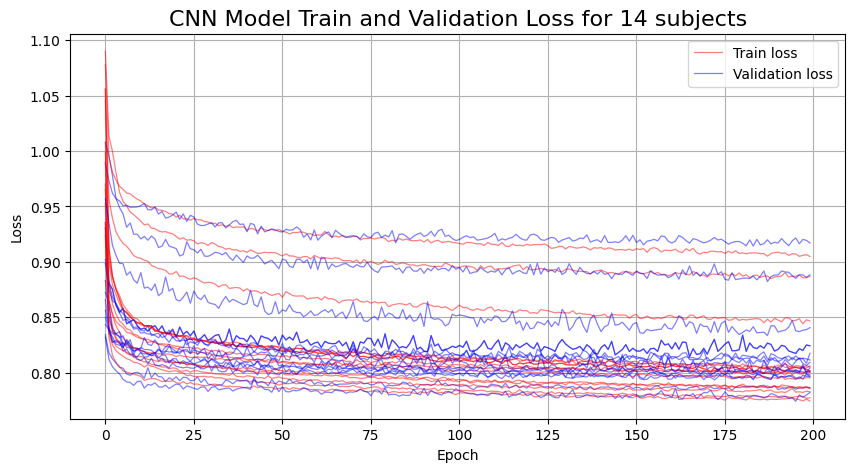

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
output_path = 'drive/MyDrive/BmiResearch/models/cnn200/NOSP_NOFE'
for subject in sorted(os.listdir(output_path)):

  output_path_subject = f'{output_path}/{subject}'
  f = codecs.open(f'{output_path_subject}/experiment_results.json', 'r', encoding='utf-8').read()
  f = json.loads(f)
  if subject == 'sub-001':
    plt.plot(range(200), f['train_dict']['loss_train_hist'], 'r-', label='Train loss', linewidth=0.9, alpha=0.5)
    plt.plot(range(200), f['train_dict']['loss_test_hist'], 'b-', label='Validation loss', linewidth=0.9, alpha=0.5)

  plt.plot(range(200), f['train_dict']['loss_train_hist'], 'r-', linewidth=0.9, alpha=0.5)
  plt.plot(range(200), f['train_dict']['loss_test_hist'], 'b-', linewidth=0.9, alpha=0.5)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.title(label="CNN Model Train and Validation Loss for 14 subjects", fontsize = 16)
plt.show()

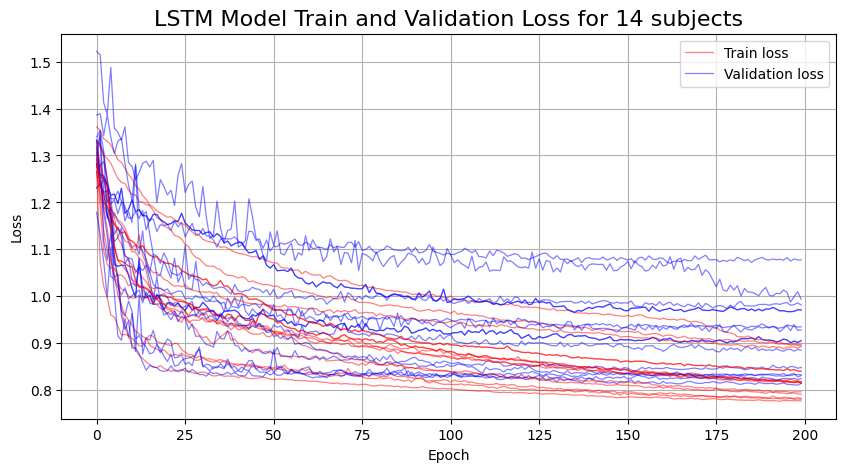

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
output_path = 'drive/MyDrive/BmiResearch/models/lstm_200/NOSP_NOFE'
for subject in sorted(os.listdir(output_path)):

  output_path_subject = f'{output_path}/{subject}'
  f = codecs.open(f'{output_path_subject}/experiment_results.json', 'r', encoding='utf-8').read()
  f = json.loads(f)
  if subject == 'sub-001':
    plt.plot(range(200), f['train_dict']['loss_train_hist'], 'r-', label='Train loss', linewidth=0.9, alpha=0.5)
    plt.plot(range(200), f['train_dict']['loss_test_hist'], 'b-', label='Validation loss', linewidth=0.9, alpha=0.5)

  plt.plot(range(200), f['train_dict']['loss_train_hist'], 'r-', linewidth=0.9, alpha=0.5)
  plt.plot(range(200), f['train_dict']['loss_test_hist'], 'b-', linewidth=0.9, alpha=0.5)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.title(label="LSTM Model Train and Validation Loss for 14 subjects", fontsize = 16)
plt.show()

# Rolling window

In [ ]:
from matplotlib.lines import Line2D

def plot_eeg(df_list, ch_list=None):
    if len(ch_list) >= 28:
        figsize = (10, 10)
    elif (len(ch_list) >= 10) & (len(ch_list) < 28):
        figsize = (10, 7)
    else:
        figsize = (10, 3)

    colors = ['red', 'blue', 'green', 'black']    # tasks_1 = ['RHS', 'LTO', 'LHS', 'RTO']

    legend_elements = [Line2D([0], [0], color=colors[0], lw=4, label='RightHS'),
                       Line2D([0], [0], color=colors[3], lw=4, label='LeftTO'),
                       Line2D([0], [0], color=colors[0], lw=4, label='LeftHS'),
                       Line2D([0], [0], color=colors[3], lw=4, label='RightTO')]

    fig, axes = plt.subplots(nrows=len(ch_list), ncols=1, figsize=figsize, sharex=True)
    for i in range(len(ch_list)):
        axes[i].plot(df_list[0][ch_list].T.to_numpy()[i, :], color='#bed6ea')
        axes[i].set_ylabel(ch_list[i])
        axes[i].set_yticks([])
        axes[i].axis('off')
        # if i == len(axes)-1:
          # axes[i].set_xticks(list(np.arange(0, 1001, 100)))
          # axes[i].set_xticklabels(list(np.arange(0, 1001, 100)))
    fig.patch.set_visible(False)


        # axes[i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    # axes[0].legend(handles=legend_elements, ncol=len(colors), fancybox=True, framealpha=1) # , fontsize="20"


    for i in range(len(ch_list)):
        axes[i].plot(df_list[1][ch_list].T.to_numpy()[i, :], color='#0d1d2b')
#         axes[i].set_ylabel(ch_list[i])
#         axes[i].set_yticks([])
#         axes[i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    for i in range(len(ch_list)):
        axes[i].plot(df_list[2][ch_list].T.to_numpy()[i, :], color='#2d618e')
#         axes[i].set_ylabel(ch_list[i])
#         axes[i].set_yticks([])
#         axes[i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    for i in range(len(ch_list)):
        axes[i].plot(df_list[3][ch_list].T.to_numpy()[i, :], color='#619bcc')
#         axes[i].set_ylabel(ch_list[i])
#         axes[i].set_yticks([])
#         axes[i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    # Set common x label and adjust layout

    plt.xlabel('Time points')

    plt.tight_layout()
#     plt.title("EEG signals of Right Foot Strike, Left Foot Strike, Right Foot Off, Left Foot Off")

    # Show plot
    plt.show()

In [ ]:
path = 'drive/MyDrive/BmiResearch/data/datasets/preprocessed/a_walk_in_the_park/low-1-high-20-frequency-500/sub-001/eeg_data.csv'
df = pd.read_csv(path)
df = df[['Cz', 'C2', 'C4', 'task']] # 'C5', 'C3', 'C1' , 'C6'
print(df.shape)
df.head()

(381805, 4)


Cz        C2            C4     task
0  1.451044e-07 -0.000002 -1.674697e-06  RightTO
1  1.368152e-08 -0.000002 -1.495885e-06  RightTO
2 -1.823180e-07 -0.000002 -1.302474e-06  RightTO
3 -4.325462e-07 -0.000002 -1.081695e-06  RightTO
4 -7.227706e-07 -0.000002 -8.240751e-07  RightTO

In [ ]:
pd.unique(df['task'])

array(['RightTO', 'RightHS', 'LeftTO', 'LeftHS'], dtype=object)

In [ ]:
electrodes = df.columns.tolist()[:-1]
electrodes = sorted(electrodes)
print(electrodes)

['C2', 'C4', 'Cz']


EEG signals of Right Foot Strike, Left Foot Strike, Right Foot Off, Left Foot Off


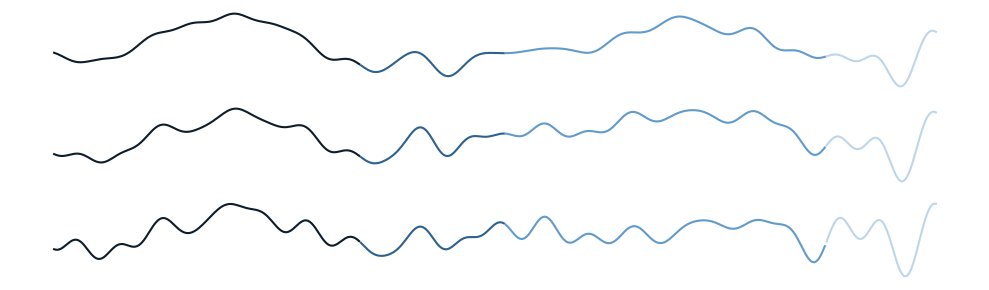

In [ ]:
df_RHS = df[100600:101101].copy()
df_RHS.loc[df_RHS.task != 'RightHS',df_RHS.columns.tolist()[:-1]] = np.nan # 'RightHS', 'LeftTO', 'LeftHS', 'RightTO'

df_LTO = df[100600:101101].copy()
df_LTO.loc[df_LTO.task != 'LeftTO',df_LTO.columns.tolist()[:-1]] = np.nan

df_LHS = df[100600:101101].copy()
df_LHS.loc[df_LTO.task != 'LeftHS',df_LHS.columns.tolist()[:-1]] = np.nan

df_RTO = df[100600:101101].copy()
df_RTO.loc[df_RTO.task != 'RightTO',df_RTO.columns.tolist()[:-1]] = np.nan

print("EEG signals of Right Foot Strike, Left Foot Strike, Right Foot Off, Left Foot Off")
plot_eeg([df_RHS, df_LTO, df_LHS, df_RTO], ch_list=df.columns.tolist()[:-1])

EEG signals of Right Foot Strike, Left Foot Strike, Right Foot Off, Left Foot Off


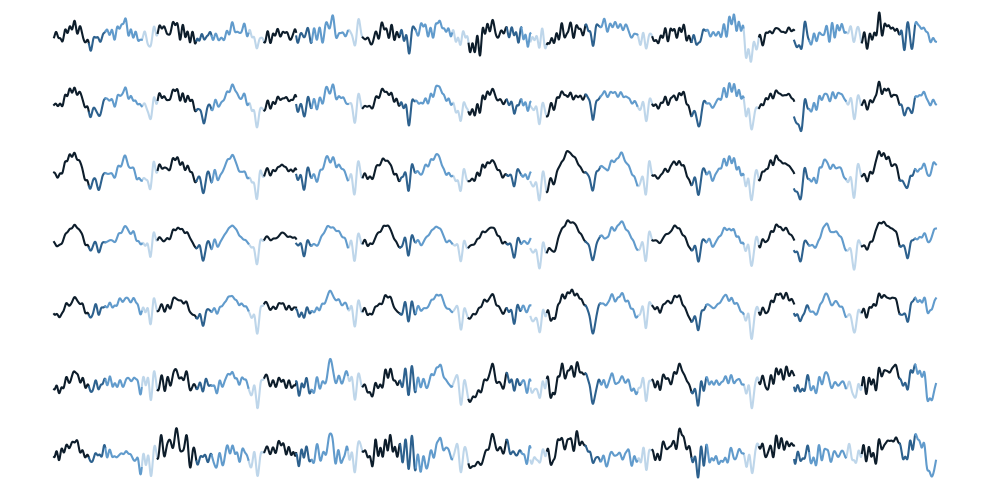

In [ ]:
df_RHS = df[100600:105000].copy()
df_RHS.loc[df_RHS.task != 'RightHS',df_RHS.columns.tolist()[:-1]] = np.nan # 'RightHS', 'LeftTO', 'LeftHS', 'RightTO'

df_LTO = df[100600:105000].copy()
df_LTO.loc[df_LTO.task != 'LeftTO',df_LTO.columns.tolist()[:-1]] = np.nan

df_LHS = df[100600:105000].copy()
df_LHS.loc[df_LTO.task != 'LeftHS',df_LHS.columns.tolist()[:-1]] = np.nan

df_RTO = df[100600:105000].copy()
df_RTO.loc[df_RTO.task != 'RightTO',df_RTO.columns.tolist()[:-1]] = np.nan

print("EEG signals of Right Foot Strike, Left Foot Strike, Right Foot Off, Left Foot Off")
plot_eeg([df_RHS, df_LTO, df_LHS, df_RTO], ch_list=df.columns.tolist()[:-1])

In [ ]:
classifier = 'drive/MyDrive/BmiResearch/models/svm'
datasets = sorted(os.listdir(classifier))
for dataset in datasets[0:2]:
  print("dataset = ", dataset)
  subjects = sorted(os.listdir(f'{classifier}/{dataset}'))
  for subject in subjects:
    output_path_subject = f'{classifier}/{dataset}/{subject}'

    f = codecs.open(f'{output_path_subject}/experiment_results.json', 'r', encoding='utf-8').read()
    f = json.loads(f)


  print(subjects)

dataset =  ASR_CSP
['sub-001', 'sub-002', 'sub-003', 'sub-004', 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-009', 'sub-010', 'sub-011', 'sub-012', 'sub-013', 'sub-014', 'sub-015', 'sub-016', 'sub-017']
dataset =  ASR_ICA
['sub-001', 'sub-002', 'sub-003', 'sub-004', 'sub-005', 'sub-006', 'sub-007', 'sub-008', 'sub-009', 'sub-010', 'sub-011', 'sub-012', 'sub-013', 'sub-014', 'sub-015', 'sub-016', 'sub-017']


In [ ]:
datasets

['ASR_CSP',
 'ASR_ICA',
 'ASR_NOFE',
 'ASR_STFT',
 'NOSP_CSP',
 'NOSP_ICA',
 'NOSP_NOFE',
 'NOSP_STFT',
 'SLF_CSP',
 'SLF_ICA',
 'SLF_NOFE',
 'SLF_STFT']

In [ ]:
f.keys()

dict_keys(['DateTime', 'LeftHS_f1_score', 'LeftHS_precision_score', 'LeftHS_recall_score', 'LeftTO_f1_score', 'LeftTO_precision_score', 'LeftTO_recall_score', 'OUTPUT_PATH', 'RightHS_f1_score', 'RightHS_precision_score', 'RightHS_recall_score', 'RightTO_f1_score', 'RightTO_precision_score', 'RightTO_recall_score', 'accuracy_score', 'best_params', 'classification', 'confusion_matrix', 'dataset_path', 'f1_score', 'feature_extraction', 'general_params', 'labels', 'len_test', 'peak_predict_MB', 'precision_score', 'pred_1_ch_s', 'prediction', 'recall_score', 'scale_1ch_s', 'sec_predict', 'signal_processing', 'subject', 'y_test'])

# ConfusionMatrix

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
classifier = 'drive/MyDrive/BmiResearch/models/cnn_es'
for dataset in sorted(os.listdir(classifier)): # subject = 'sub-003'
  f = codecs.open(f'{classifier}/sub-003/experiment_results.json', 'r', encoding='utf-8').read()
  f = json.loads(f)
  disp = ConfusionMatrixDisplay(confusion_matrix=np.round(np.asarray(f['confusion_matrix']), decimals=3),
                              display_labels=f['labels'])
  disp.plot(cmap=plt.cm.Blues,values_format='g')
  plt.title(f'CNN, NOSP, ICA, F1={f["f1_score"]*100}%')
  plt.show()



ASR_CSP
ASR_ICA
ASR_NOFE
ASR_STFT
NOSP_CSP
NOSP_ICA
NOSP_NOFE
NOSP_STFT
SLF_CSP
SLF_ICA
SLF_NOFE
SLF_STFT


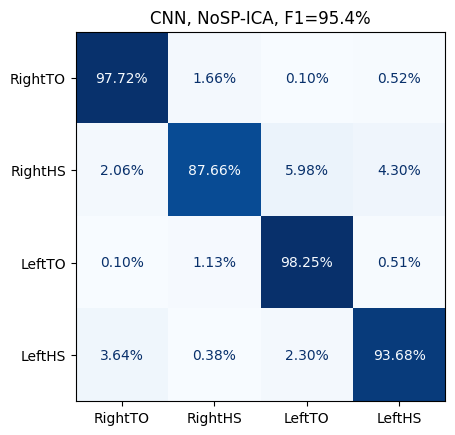


CNN, NoSP-ICA, F1=95.4%
[[97.72  1.66  0.1   0.52]
 [ 2.06 87.66  5.98  4.3 ]
 [ 0.1   1.13 98.25  0.51]
 [ 3.64  0.38  2.3  93.68]]


In [ ]:
classifier = 'drive/MyDrive/BmiResearch/models/cnn_es'
dataset = 'NOSP_ICA'
subject = 'sub-002'
output_path_subject = f'{classifier}/{dataset}/{subject}'
f = codecs.open(f'{output_path_subject}/experiment_results.json', 'r', encoding='utf-8').read()
f = json.loads(f)

disp = ConfusionMatrixDisplay.from_predictions(f['y_test'], f["prediction"], display_labels=f['labels'], colorbar=False, cmap=plt.cm.Blues,values_format='.2%', normalize='true')

disp.ax_.set_xlabel('')
disp.ax_.set_ylabel('')
plt.title(f'CNN, NoSP-ICA, F1={np.round(f["f1_score"]*100,4)}%')
plt.show()
print()


y_t = list(map(int, f['y_test']))
pr = list(map(int, f['prediction']))

cm = confusion_matrix([class_names_dict_1[el] for el in y_t], [class_names_dict_1[el] for el in pr], labels=f['labels'], normalize='true')
print(f'CNN, NoSP-ICA, F1={np.round(f["f1_score"]*100,4)}%')
print(np.round(cm*100, 2))

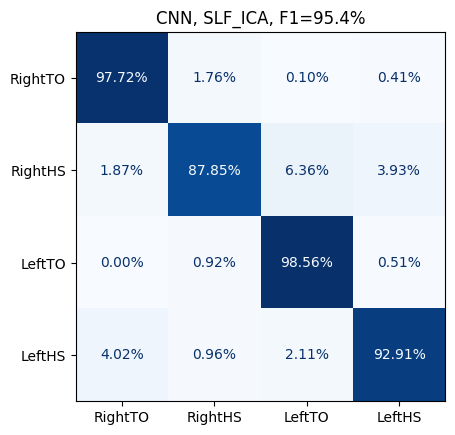


CNN, SLF_ICA=95.4%
[[97.72  1.76  0.1   0.41]
 [ 1.87 87.85  6.36  3.93]
 [ 0.    0.92 98.56  0.51]
 [ 4.02  0.96  2.11 92.91]]


In [ ]:
classifier = 'drive/MyDrive/BmiResearch/models/cnn_es'
dataset = 'SLF_ICA'
subject = 'sub-002'
output_path_subject = f'{classifier}/{dataset}/{subject}'
f = codecs.open(f'{output_path_subject}/experiment_results.json', 'r', encoding='utf-8').read()
f = json.loads(f)

disp = ConfusionMatrixDisplay.from_predictions(f['y_test'], f["prediction"], display_labels=f['labels'], colorbar=False, cmap=plt.cm.Blues,values_format='.2%', normalize='true')

disp.ax_.set_xlabel('')
disp.ax_.set_ylabel('')
plt.title(f'CNN, SLF_ICA, F1={np.round(f["f1_score"]*100,2)}%')
plt.show()
print()


y_t = list(map(int, f['y_test']))
pr = list(map(int, f['prediction']))

cm = confusion_matrix([class_names_dict_1[el] for el in y_t], [class_names_dict_1[el] for el in pr], labels=f['labels'], normalize='true')
print(f'CNN, SLF_ICA={np.round(f["f1_score"]*100,2)}%')
print(np.round(cm*100, 2))

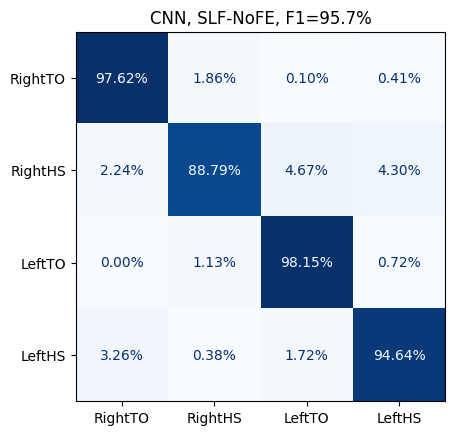


CNN, SLF-NoFE=95.7%
[[97.62  1.86  0.1   0.41]
 [ 2.24 88.79  4.67  4.3 ]
 [ 0.    1.13 98.15  0.72]
 [ 3.26  0.38  1.72 94.64]]


In [ ]:
classifier = 'drive/MyDrive/BmiResearch/models/cnn_es'
dataset = 'SLF_NOFE'
subject = 'sub-002'
output_path_subject = f'{classifier}/{dataset}/{subject}'
f = codecs.open(f'{output_path_subject}/experiment_results.json', 'r', encoding='utf-8').read()
f = json.loads(f)

disp = ConfusionMatrixDisplay.from_predictions(f['y_test'], f["prediction"], display_labels=f['labels'], colorbar=False, cmap=plt.cm.Blues,values_format='.2%', normalize='true')

disp.ax_.set_xlabel('')
disp.ax_.set_ylabel('')
plt.title(f'CNN, SLF-NoFE, F1={f["f1_score"]*100}%')
plt.show()
print()


y_t = list(map(int, f['y_test']))
pr = list(map(int, f['prediction']))

cm = confusion_matrix([class_names_dict_1[el] for el in y_t], [class_names_dict_1[el] for el in pr], labels=f['labels'], normalize='true')
print(f'CNN, SLF-NoFE={f["f1_score"]*100}%')
print(np.round(cm*100, 2))

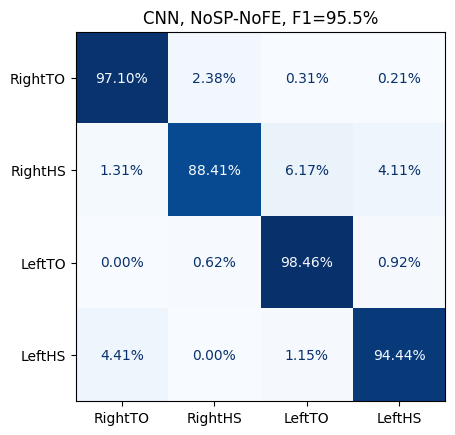


CNN, NoSP-NoFE=95.5%
[[97.1   2.38  0.31  0.21]
 [ 1.31 88.41  6.17  4.11]
 [ 0.    0.62 98.46  0.92]
 [ 4.41  0.    1.15 94.44]]


In [ ]:
classifier = 'drive/MyDrive/BmiResearch/models/cnn_es'
dataset = 'NOSP_NOFE'
subject = 'sub-002'
output_path_subject = f'{classifier}/{dataset}/{subject}'
f = codecs.open(f'{output_path_subject}/experiment_results.json', 'r', encoding='utf-8').read()
f = json.loads(f)

disp = ConfusionMatrixDisplay.from_predictions(f['y_test'], f["prediction"], display_labels=f['labels'], colorbar=False, cmap=plt.cm.Blues,values_format='.2%', normalize='true')

disp.ax_.set_xlabel('')
disp.ax_.set_ylabel('')
plt.title(f'CNN, NoSP-NoFE, F1={f["f1_score"]*100}%')
plt.show()
print()


y_t = list(map(int, f['y_test']))
pr = list(map(int, f['prediction']))

cm = confusion_matrix([class_names_dict_1[el] for el in y_t], [class_names_dict_1[el] for el in pr], labels=f['labels'], normalize='true')
print(f'CNN, NoSP-NoFE={f["f1_score"]*100}%')
print(np.round(cm*100, 2))

In [ ]:
y_t = list(map(int, f['y_test']))
pr = list(map(int, f['prediction']))

In [ ]:
class_names_dict_1[y_t[0]]

'LeftTO'

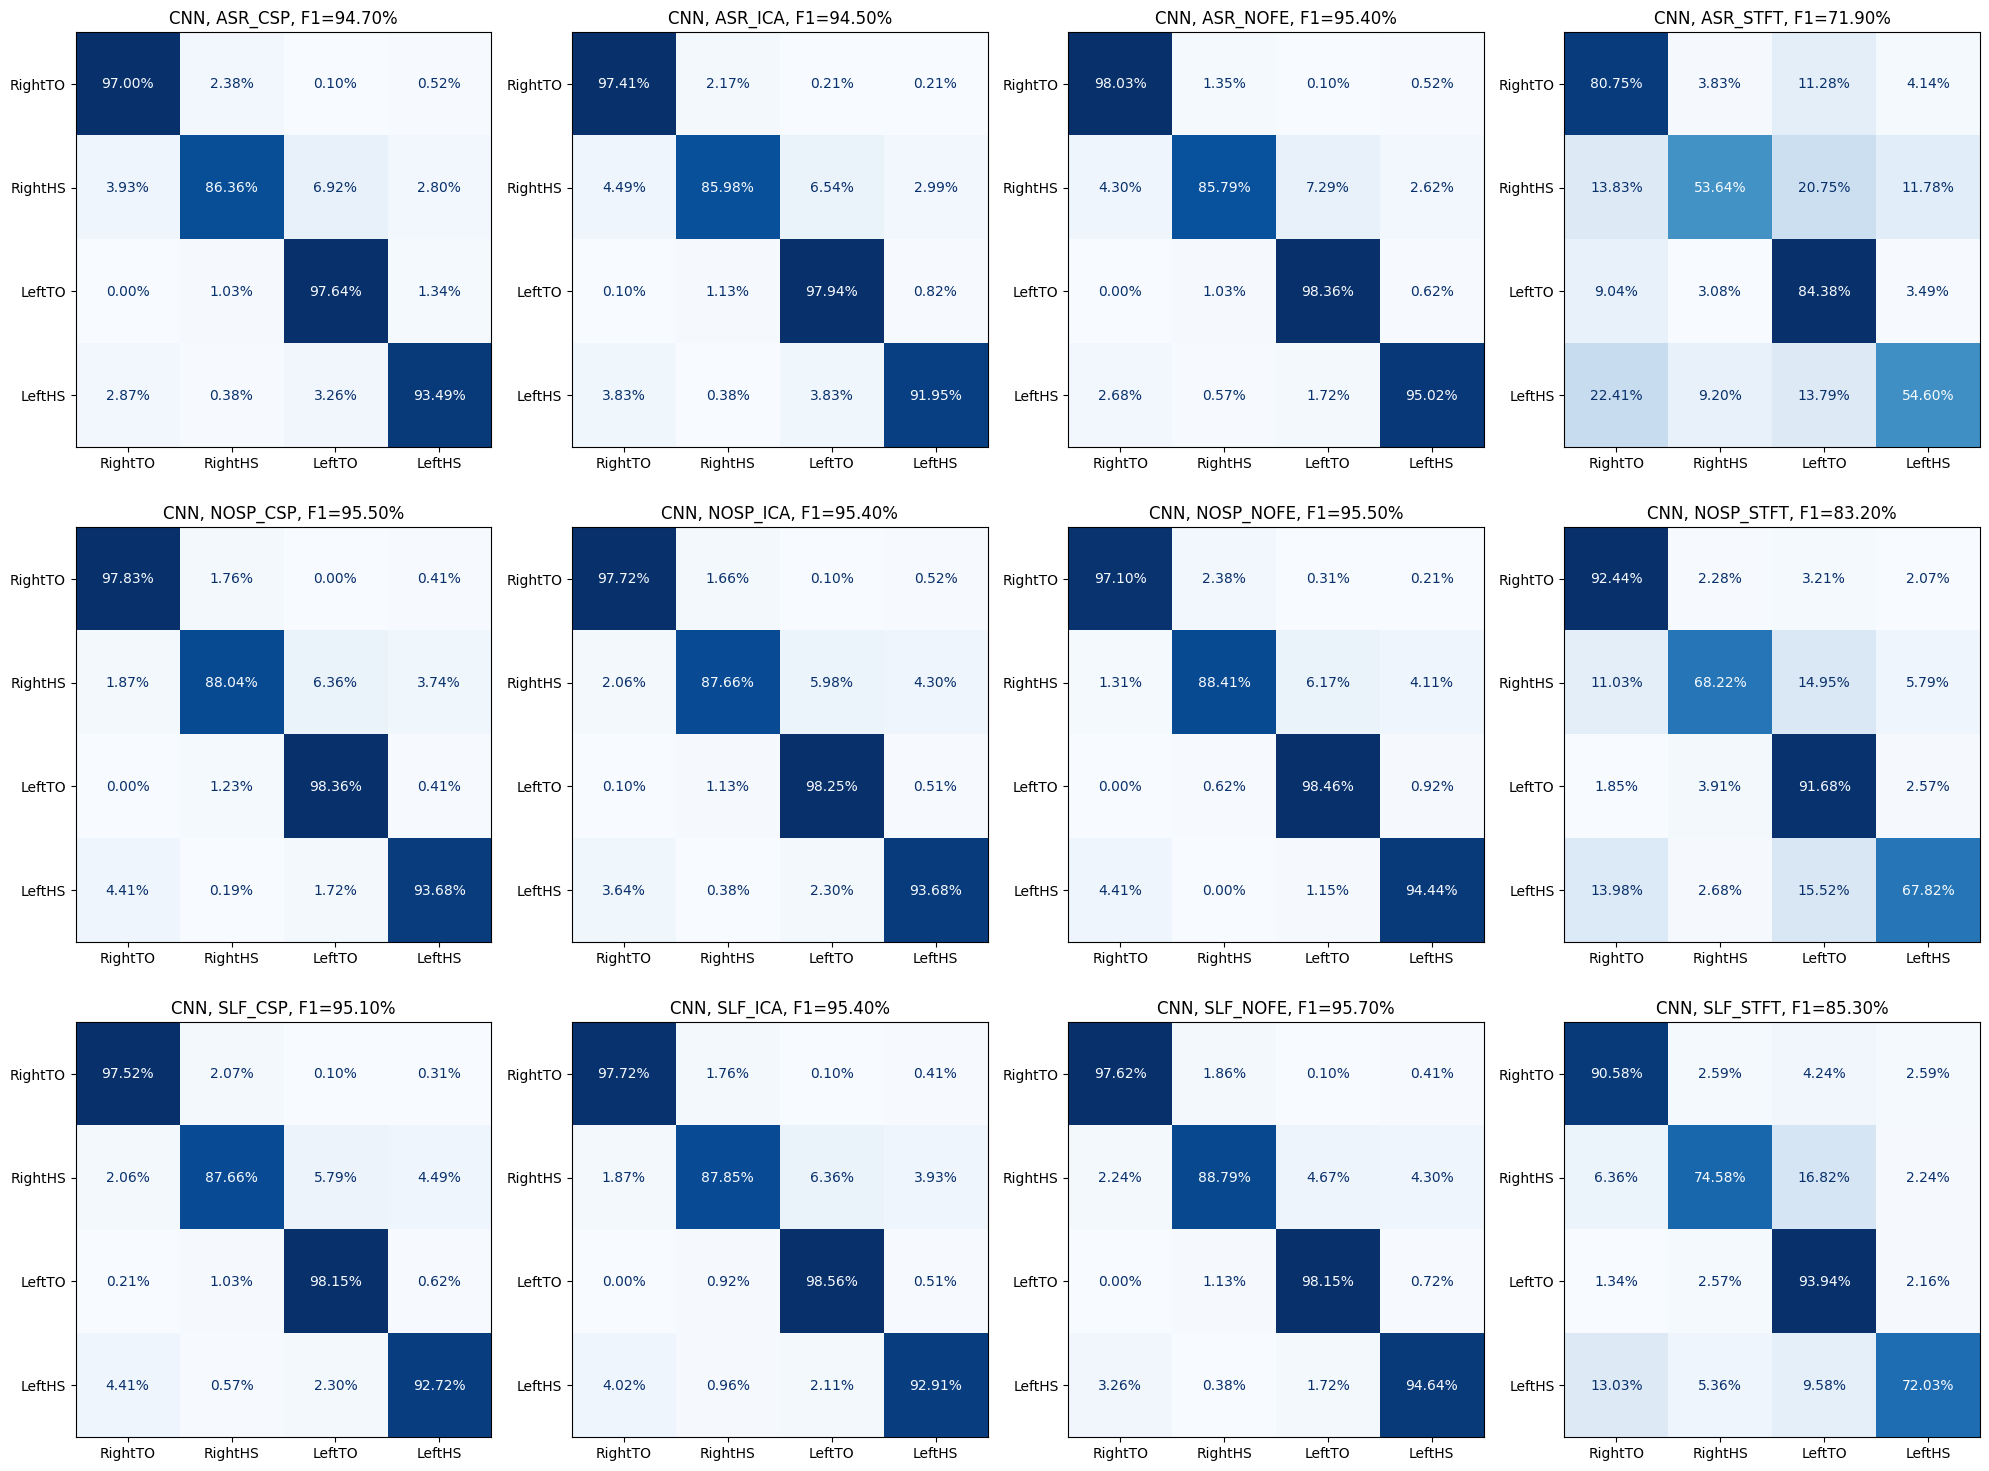

In [ ]:
classifier = 'drive/MyDrive/BmiResearch/models/cnn_es'

# Create a 3x4 grid of subplots (total 12 subplots)
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()  # Flatten the 3x4 array of axes for easy iteration

# Initialize the subplot index
i = 0

# Loop through datasets and plot confusion matrices
for dataset in sorted(os.listdir(classifier)):
    if i >= len(axes):  # Make sure we don't exceed available subplots
        break

    # Read the experiment results
    f = codecs.open(f'{classifier}/{dataset}/sub-002/experiment_results.json', 'r', encoding='utf-8').read()
    f = json.loads(f)

    # Plot the confusion matrix into the specific subplot using 'ax=axes[i]'
    disp = ConfusionMatrixDisplay.from_predictions(f['y_test'], f["prediction"],
                                                   display_labels=f['labels'],
                                                   colorbar=False, cmap=plt.cm.Blues,
                                                  #  values_format='g', ax=axes[i],
                                                   values_format='.3%',  # Display values as percentages
                                                   ax=axes[i],
                                                   normalize='true')
    disp.ax_.set_xlabel('')
    disp.ax_.set_ylabel('')

    # Set title for each subplot
    axes[i].set_title(f'CNN, {dataset}, F1={f["f1_score"]*100:.2f}%')

    # Increment subplot index
    i += 1

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

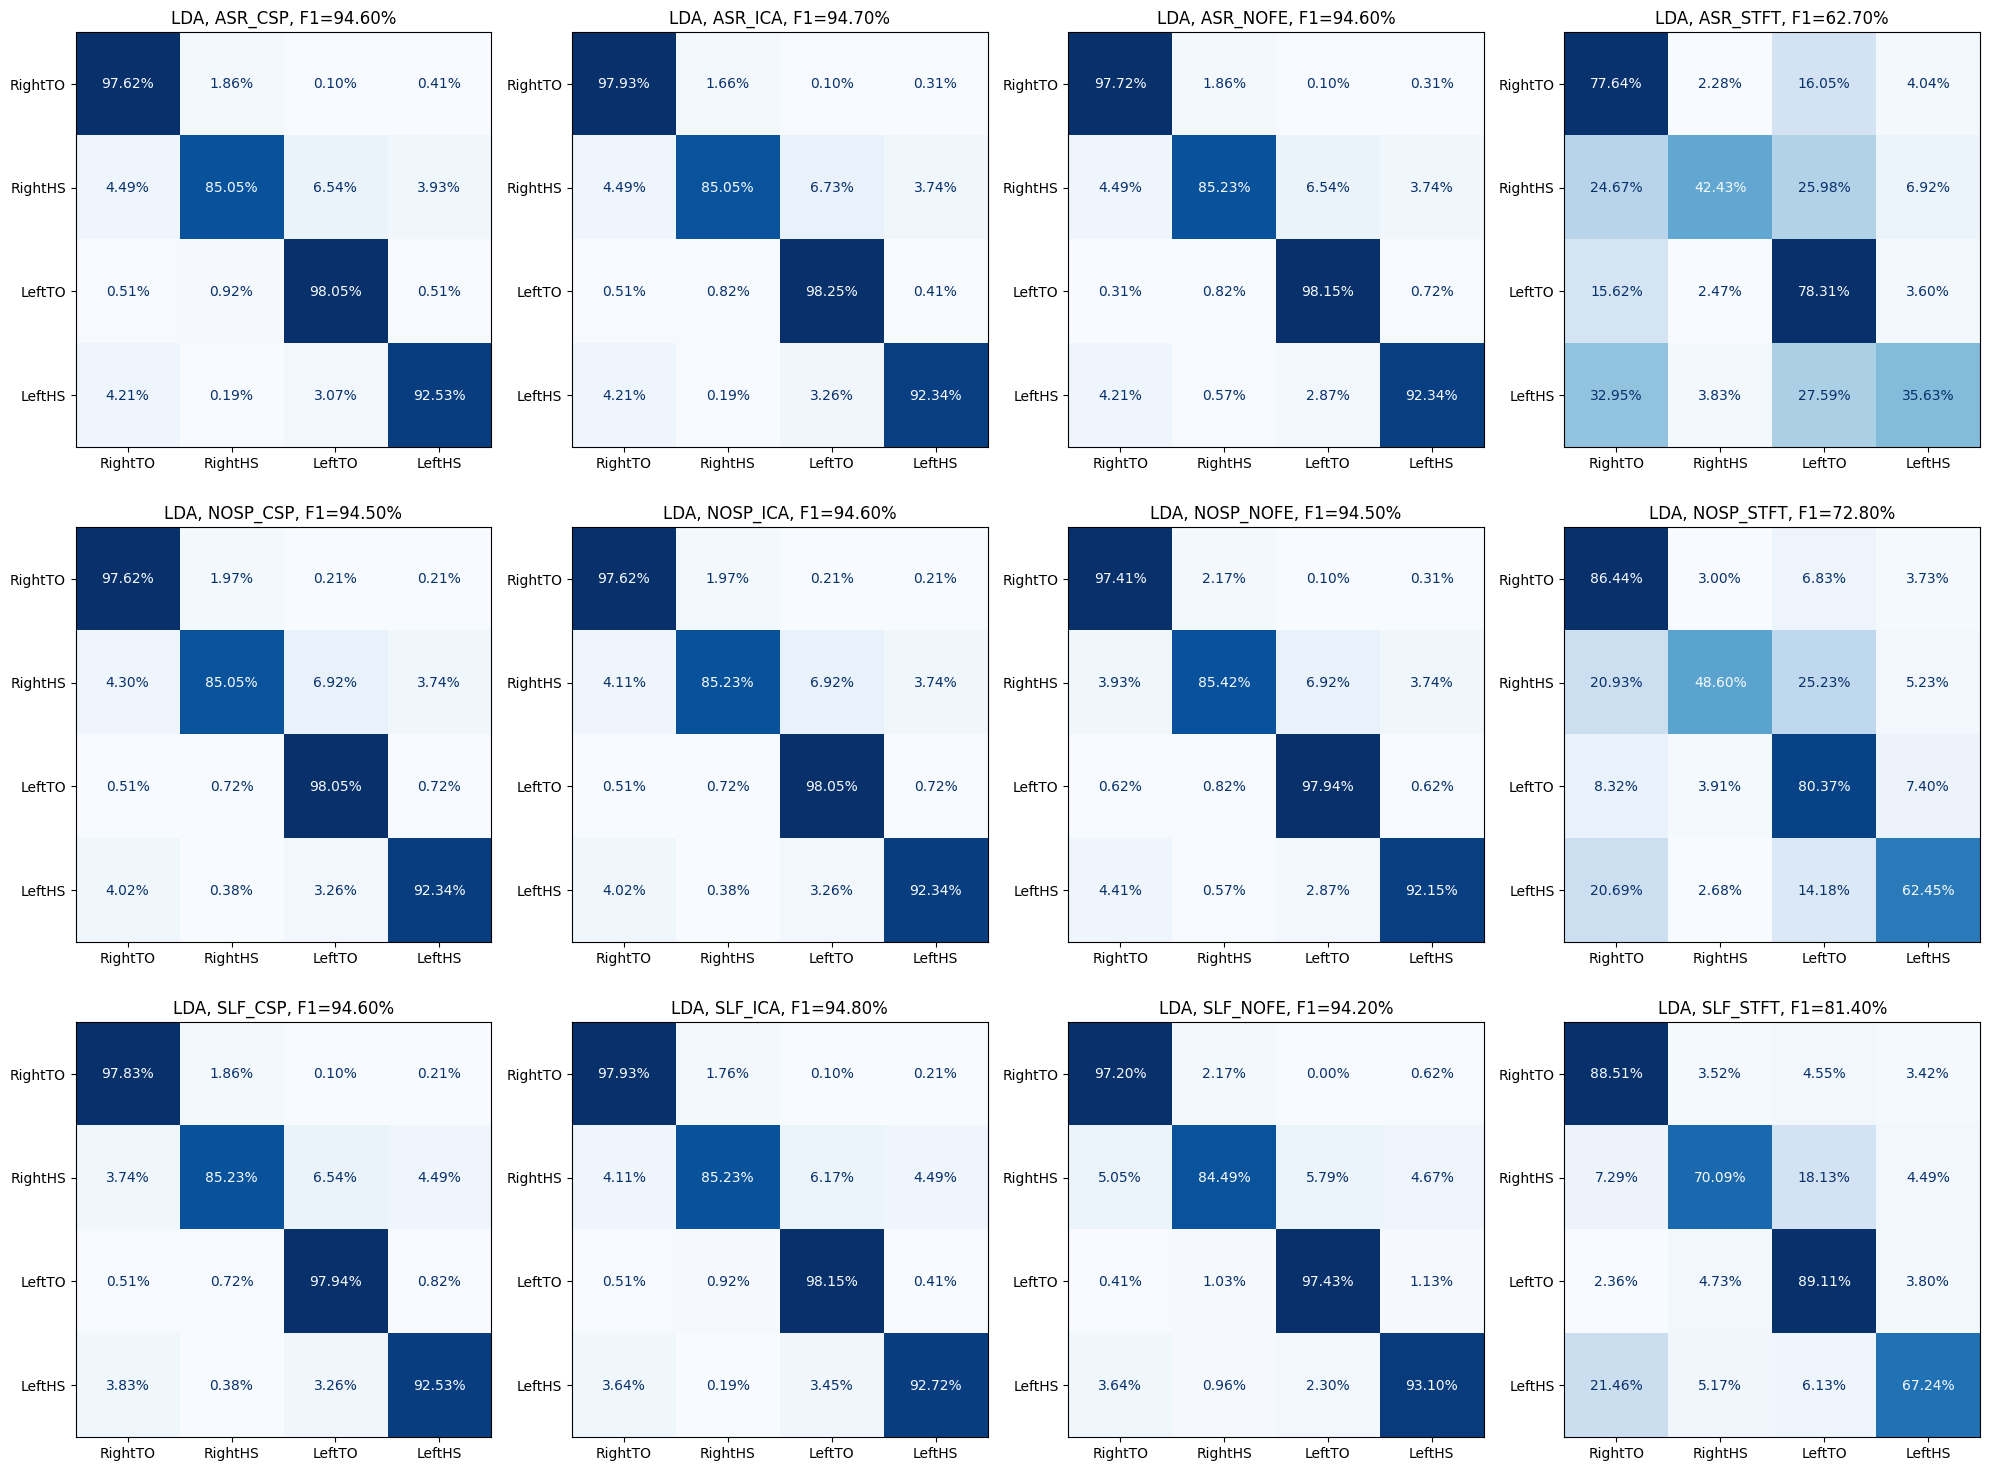

In [ ]:
classifier = 'drive/MyDrive/BmiResearch/models/lda'

# Create a 3x4 grid of subplots (total 12 subplots)
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()  # Flatten the 3x4 array of axes for easy iteration

# Initialize the subplot index
i = 0

# Loop through datasets and plot confusion matrices
for dataset in sorted(os.listdir(classifier)):
    if i >= len(axes):  # Make sure we don't exceed available subplots
        break

    # Read the experiment results
    f = codecs.open(f'{classifier}/{dataset}/sub-002/experiment_results.json', 'r', encoding='utf-8').read()
    f = json.loads(f)

    # Plot the confusion matrix into the specific subplot using 'ax=axes[i]'
    disp = ConfusionMatrixDisplay.from_predictions(f['y_test'], f["prediction"],
                                                   display_labels=f['labels'],
                                                   colorbar=False, cmap=plt.cm.Blues,
                                                  #  values_format='g', ax=axes[i],
                                                   values_format='.2%',  # Display values as percentages
                                                   ax=axes[i],
                                                   normalize='true')
    disp.ax_.set_xlabel('')
    disp.ax_.set_ylabel('')

    # Set title for each subplot
    axes[i].set_title(f'LDA, {dataset}, F1={f["f1_score"]*100:.2f}%')

    # Increment subplot index
    i += 1

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

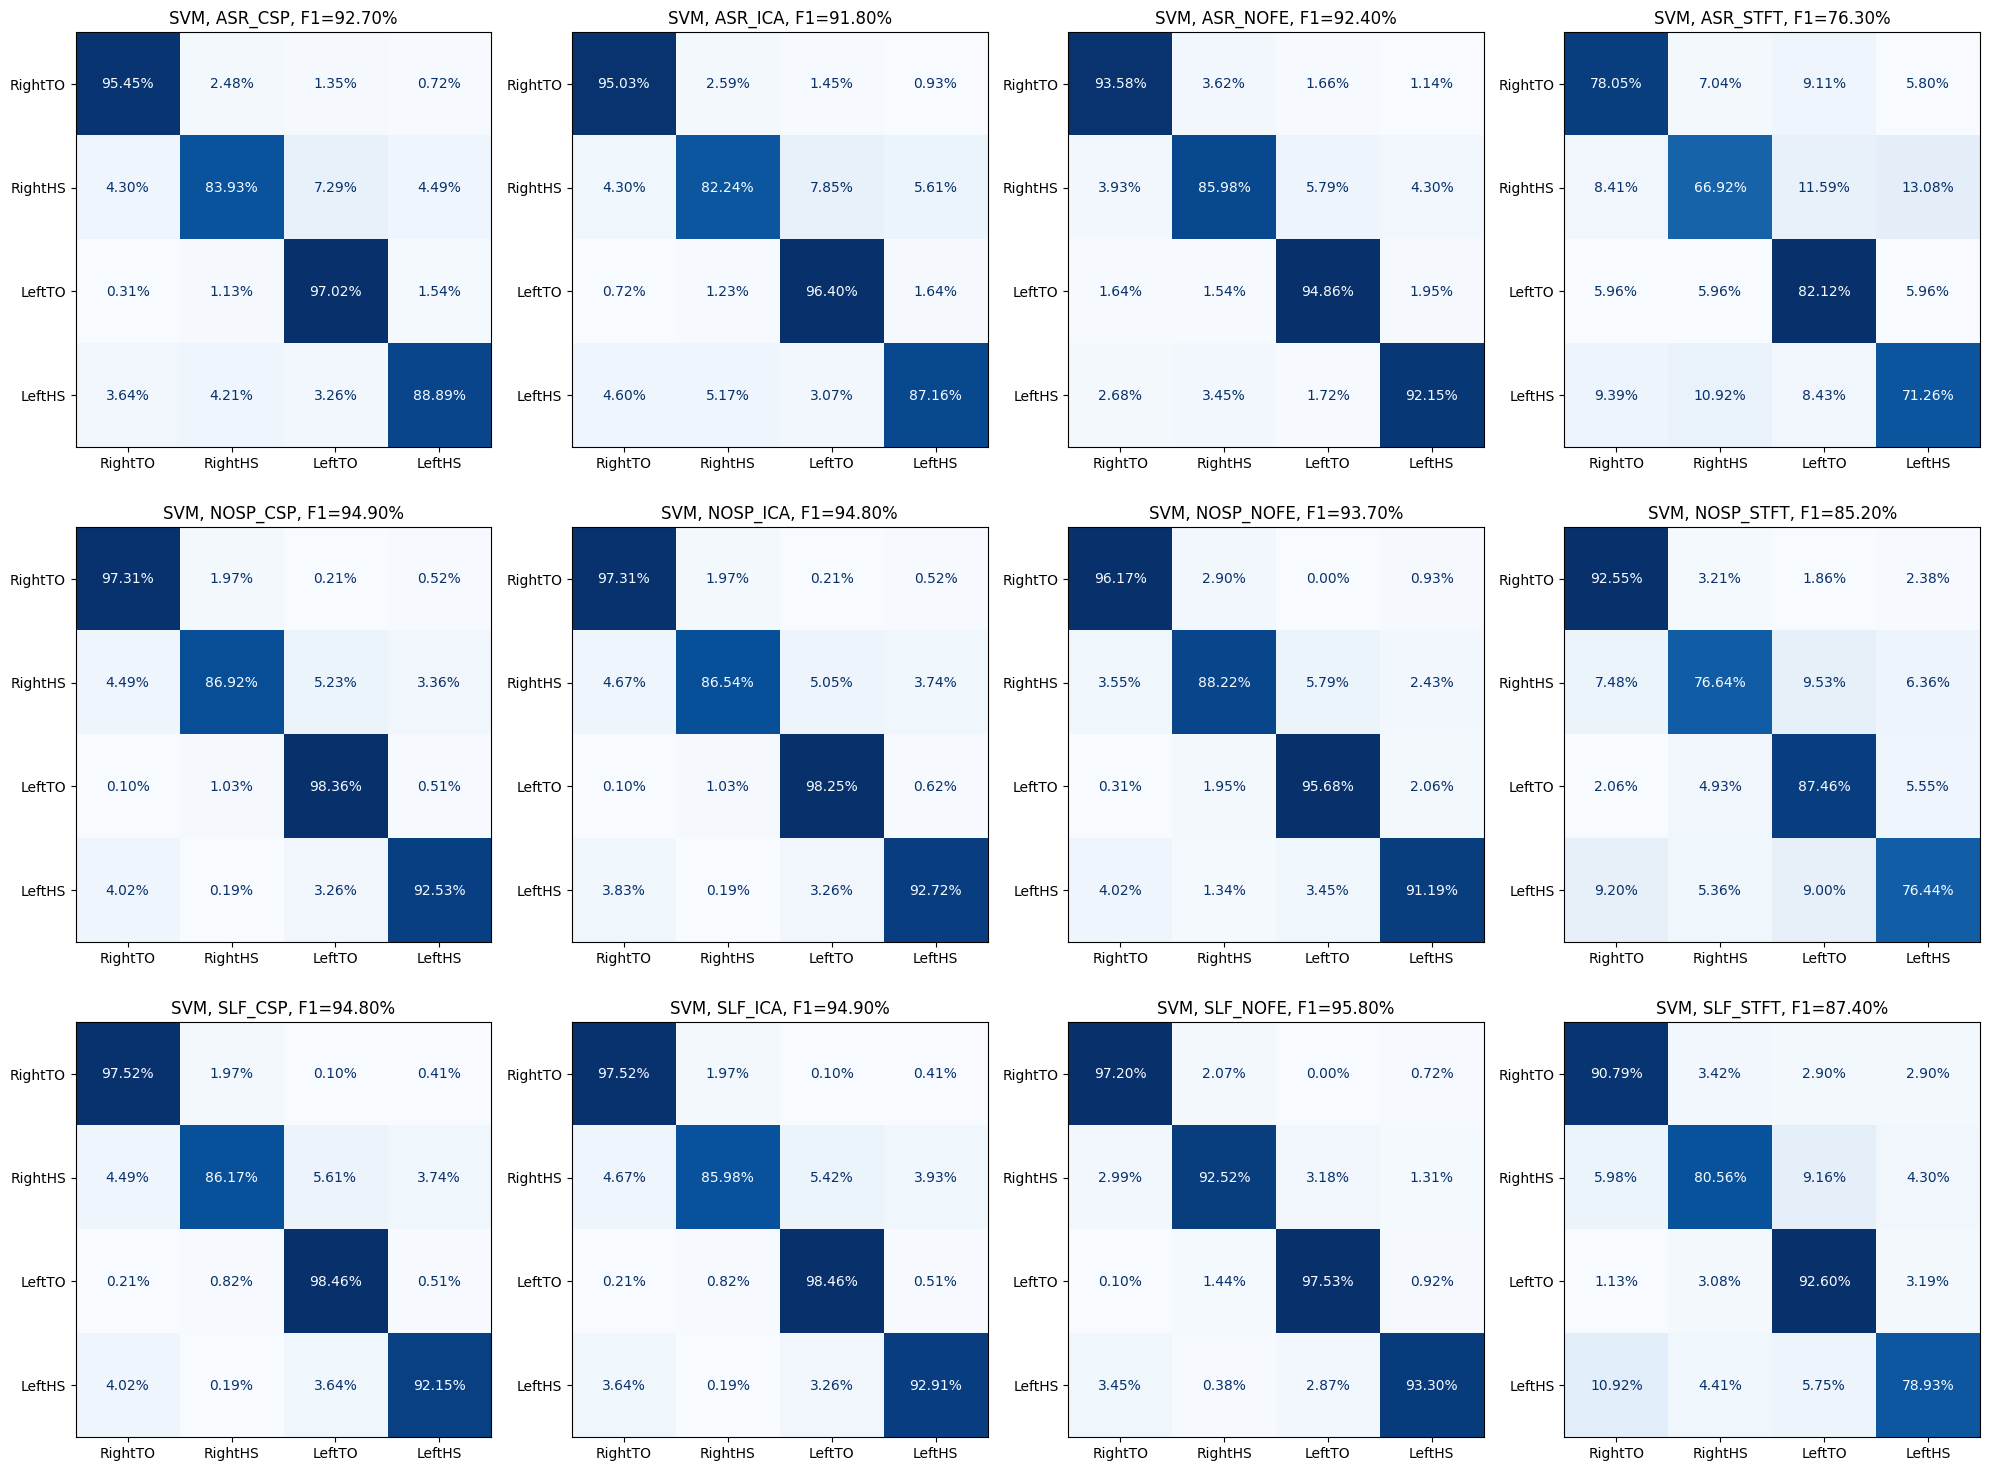

In [ ]:
classifier = 'drive/MyDrive/BmiResearch/models/svm'

# Create a 3x4 grid of subplots (total 12 subplots)
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()  # Flatten the 3x4 array of axes for easy iteration

# Initialize the subplot index
i = 0

# Loop through datasets and plot confusion matrices
for dataset in sorted(os.listdir(classifier)):
    if i >= len(axes):  # Make sure we don't exceed available subplots
        break

    # Read the experiment results
    f = codecs.open(f'{classifier}/{dataset}/sub-002/experiment_results.json', 'r', encoding='utf-8').read()
    f = json.loads(f)

    # Plot the confusion matrix into the specific subplot using 'ax=axes[i]'
    disp = ConfusionMatrixDisplay.from_predictions(f['y_test'], f["prediction"],
                                                   display_labels=f['labels'],
                                                   colorbar=False, cmap=plt.cm.Blues,
                                                  #  values_format='g', ax=axes[i],
                                                   values_format='.2%',  # Display values as percentages
                                                   ax=axes[i],
                                                   normalize='true')
    disp.ax_.set_xlabel('')
    disp.ax_.set_ylabel('')

    # Set title for each subplot
    axes[i].set_title(f'SVM, {dataset}, F1={f["f1_score"]*100:.2f}%')

    # Increment subplot index
    i += 1

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

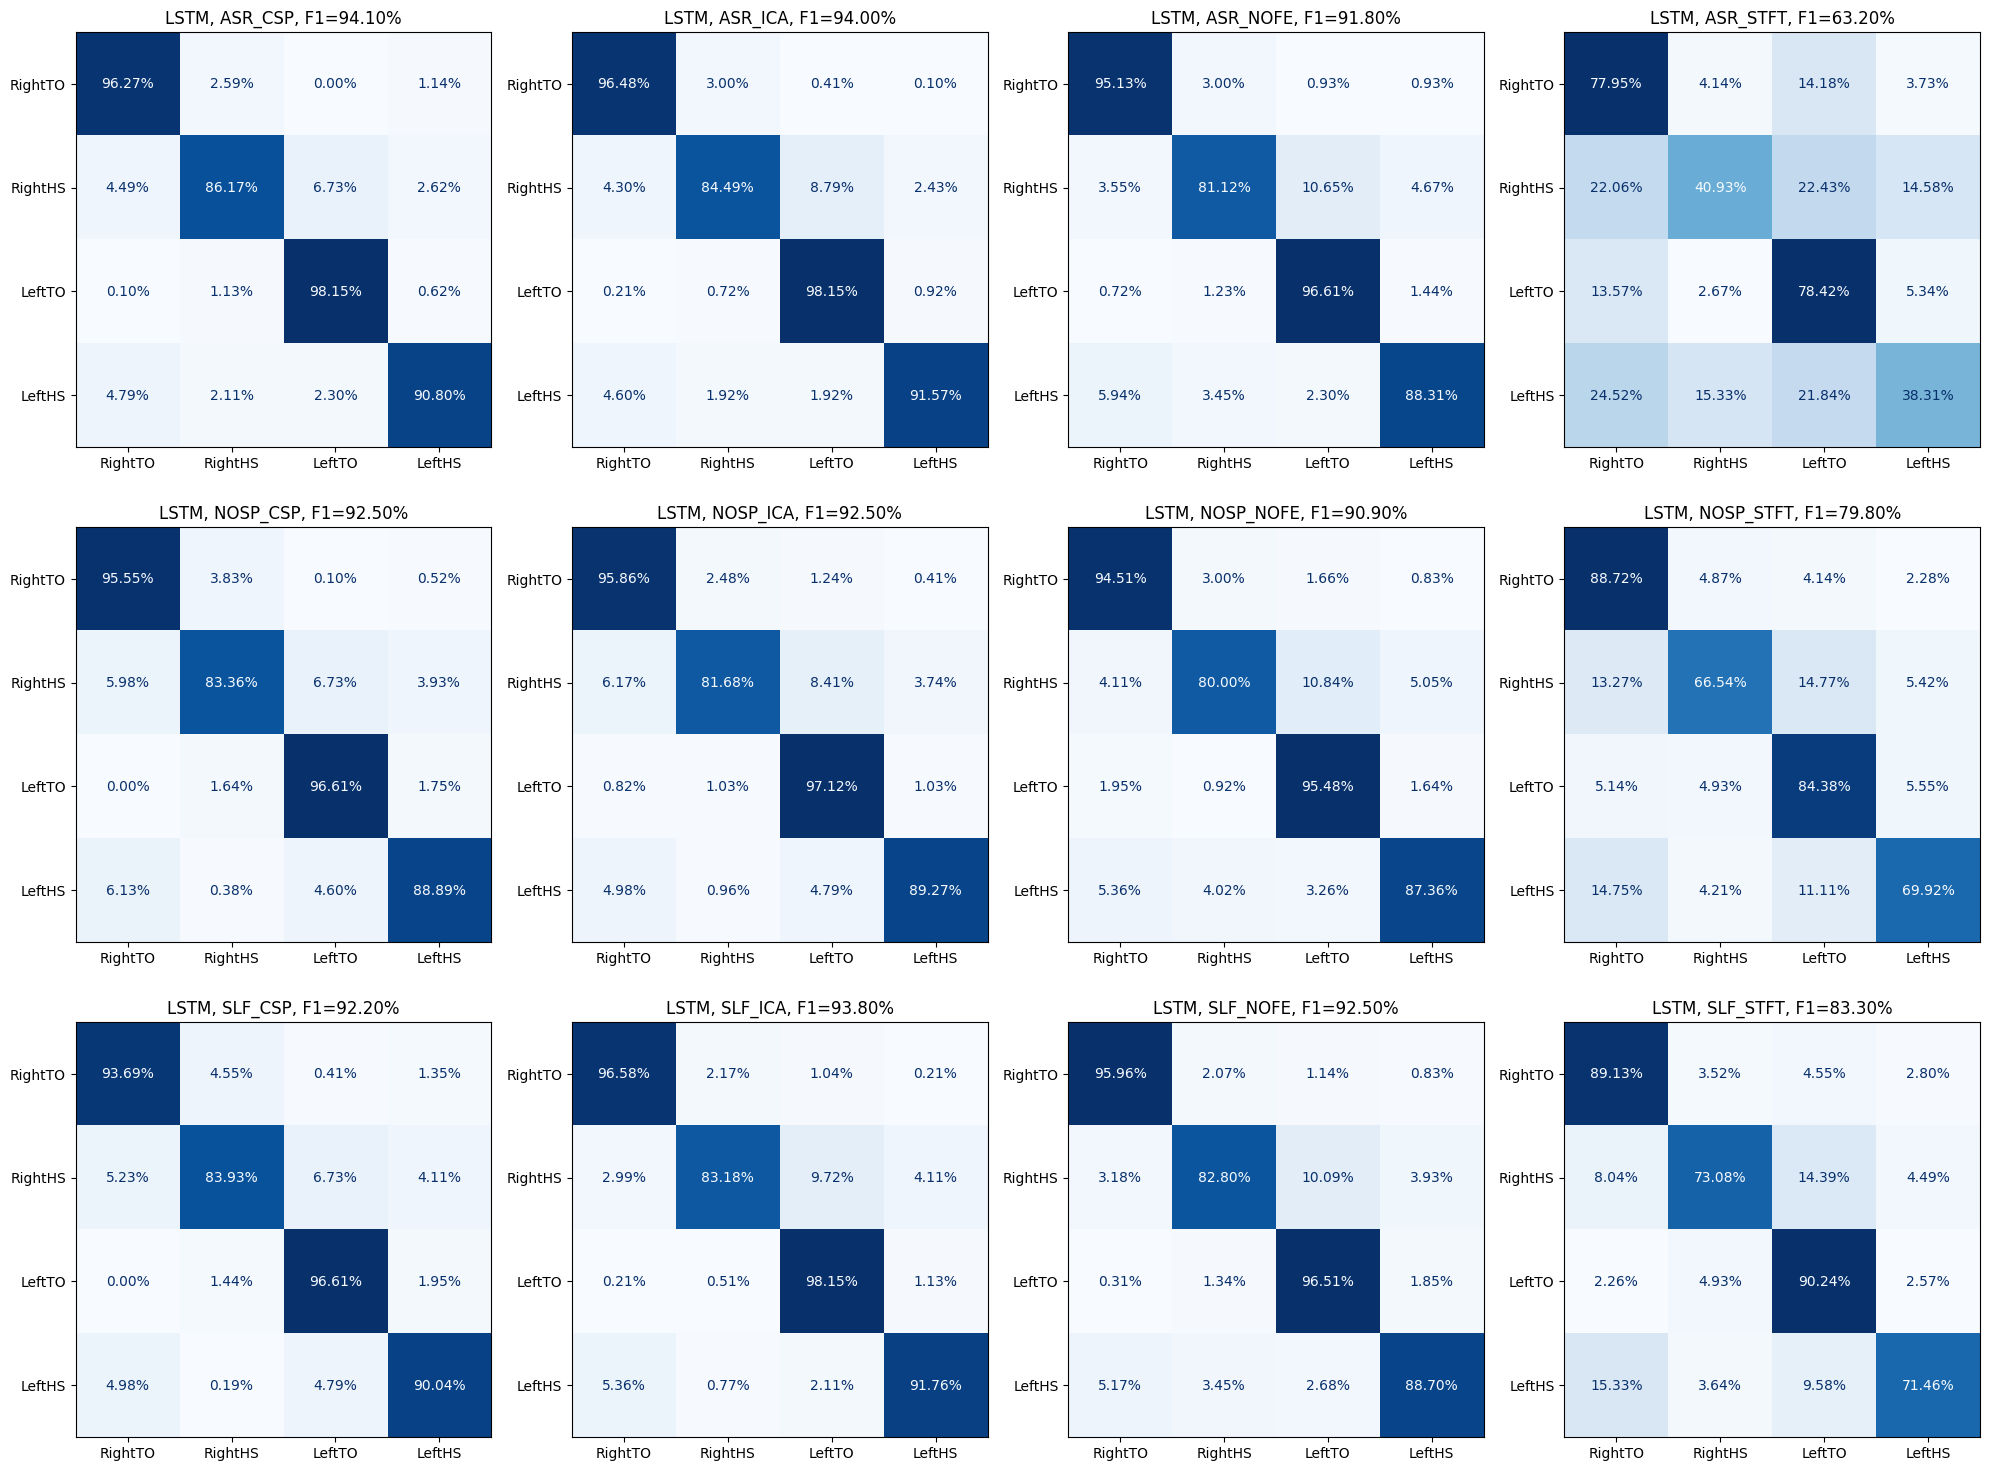

In [ ]:
classifier = 'drive/MyDrive/BmiResearch/models/lstm_es2'

# Create a 3x4 grid of subplots (total 12 subplots)
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()  # Flatten the 3x4 array of axes for easy iteration

# Initialize the subplot index
i = 0

# Loop through datasets and plot confusion matrices
for dataset in sorted(os.listdir(classifier)):
    if i >= len(axes):  # Make sure we don't exceed available subplots
        break

    # Read the experiment results
    f = codecs.open(f'{classifier}/{dataset}/sub-002/experiment_results.json', 'r', encoding='utf-8').read()
    f = json.loads(f)

    # Plot the confusion matrix into the specific subplot using 'ax=axes[i]'
    disp = ConfusionMatrixDisplay.from_predictions(f['y_test'], f["prediction"],
                                                   display_labels=f['labels'],
                                                   colorbar=False, cmap=plt.cm.Blues,
                                                  #  values_format='g', ax=axes[i],
                                                   values_format='.2%',  # Display values as percentages
                                                   ax=axes[i],
                                                   normalize='true')
    disp.ax_.set_xlabel('')
    disp.ax_.set_ylabel('')

    # Set title for each subplot
    axes[i].set_title(f'LSTM, {dataset}, F1={f["f1_score"]*100:.2f}%')

    # Increment subplot index
    i += 1

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

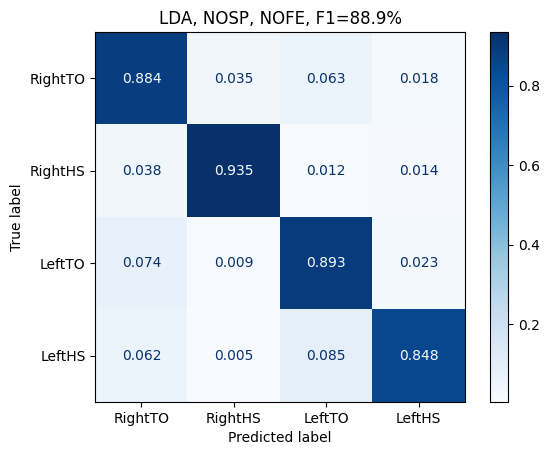

In [ ]:
classifier = 'drive/MyDrive/BmiResearch/models/lda'
dataset = 'NOSP_NOFE'
subject = 'sub-001'
output_path_subject = f'{classifier}/{dataset}/{subject}'
f = codecs.open(f'{output_path_subject}/experiment_results.json', 'r', encoding='utf-8').read()
f = json.loads(f)

disp = ConfusionMatrixDisplay(confusion_matrix=np.round(np.asarray(f['confusion_matrix']), decimals=3),
                              display_labels=f['labels'])
# print(f'            LDA, NOSP, NOFE, F1={f["f1_score"]*100}%')
disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.title(f'LDA, NOSP, NOFE, F1={f["f1_score"]*100}%')
plt.show()

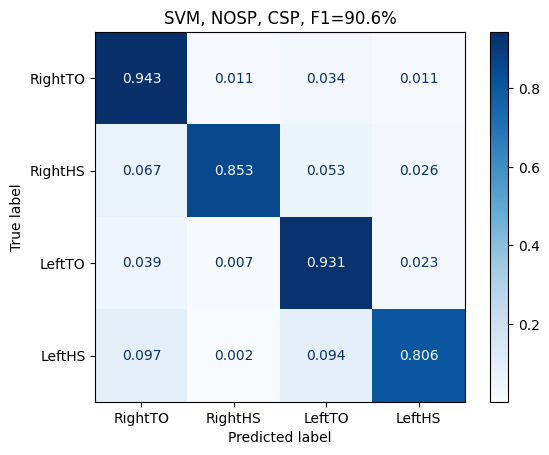

In [ ]:
classifier = 'drive/MyDrive/BmiResearch/models/svm'
dataset = 'NOSP_CSP'
subject = 'sub-001'
output_path_subject = f'{classifier}/{dataset}/{subject}'
f = codecs.open(f'{output_path_subject}/experiment_results.json', 'r', encoding='utf-8').read()
f = json.loads(f)

disp = ConfusionMatrixDisplay(confusion_matrix=np.round(np.asarray(f['confusion_matrix']), decimals=3),
                              display_labels=f['labels'])
# print(f'            SVM, NOSP, CSP, F1={round(f["f1_score"]*100, 3)}%')
disp.plot(cmap=plt.cm.Blues,values_format='g')
plt.title(f'SVM, NOSP, CSP, F1={round(f["f1_score"]*100, 3)}%')
plt.show()

# Topomap NOSP-NOFE

In [ ]:
!pip install mne
import mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 12.8 MB/s eta 0:00:00


In [ ]:
path = 'drive/MyDrive/BmiResearch/data/datasets/preprocessed/a_walk_in_the_park/low-1-high-20-frequency-500/sub-001/eeg_data.csv'
df = pd.read_csv(path)

NameError: name 'pd' is not defined

In [ ]:
df.shape

In [ ]:
electrodes = list(df.columns)[0:-1]
print(electrodes)

In [ ]:
info = mne.create_info(ch_names=electrodes, sfreq=500, ch_types='eeg')
montage = mne.channels.make_standard_montage('standard_1020')
info.set_montage(montage)

In [ ]:
rto_data = df[df['task'] == 'RightTO'][electrodes].mean().values
fig, ax = plt.subplots(figsize=(8, 6))
plt.title(f'Average RightTO')
mne.viz.plot_topomap(rto_data, info, axes=ax, show=True)
plt.figure(figsize=(8, 6))
plt.show()

In [ ]:
# {'RightTO': 0, 'RightHS': 1, 'LeftTO': 2, 'LeftHS': 3}
rto_data = df[df['task'] == 'RightHS'][electrodes].mean().values
fig, ax = plt.subplots(figsize=(8, 6))
plt.title(f'Average RightHS')
mne.viz.plot_topomap(rto_data, info, axes=ax, show=True)
plt.figure(figsize=(8, 6))
plt.show()

In [ ]:
# {'RightTO': 0, 'RightHS': 1, 'LeftTO': 2, 'LeftHS': 3}
rto_data = df[df['task'] == 'LeftTO'][electrodes].mean().values
fig, ax = plt.subplots(figsize=(8, 6))
plt.title(f'Average LeftTO')
mne.viz.plot_topomap(rto_data, info, axes=ax, show=True)
plt.figure(figsize=(8, 6))
plt.show()

In [ ]:
# {'RightTO': 0, 'RightHS': 1, 'LeftTO': 2, 'LeftHS': 3}
rto_data = df[df['task'] == 'LeftHS'][electrodes].mean().values
fig, ax = plt.subplots(figsize=(8, 6))
plt.title(f'Average LeftHS')
mne.viz.plot_topomap(rto_data, info, axes=ax, show=True)
plt.figure(figsize=(8, 6))
plt.show()

# SLF

In [ ]:
dataset_path = 'drive/MyDrive/BmiResearch/data/datasets/preprocessed/a_walk_in_the_park/SLF/sub-001/X_fit.json'
proc_df = codecs.open(dataset_path, 'r', encoding='utf-8').read()
proc_df = json.loads(proc_df)
proc_df = np.array(proc_df)
proc_df = pd.DataFrame(data = proc_df, columns=electrodes)
print(proc_df.shape)
proc_df.head(2)

(321805, 33)


Fz        F3       FC1        C3       CP5       CP1        Pz  \
0 -0.000018 -0.000006  0.000037  0.000013 -0.000011  0.000003  0.000011   
1 -0.000016 -0.000003  0.000036  0.000015 -0.000008  0.000007  0.000011   

         P3            O1        Oz  ...        P5       PO3      PO4  \
0  0.000008 -6.121033e-06  0.000038  ...  0.000064  0.000018 -0.00003   
1  0.000012 -7.343978e-07  0.000046  ...  0.000056  0.000015 -0.00003   

         P6       CPz       CP4        C6        C2       FC4        F6  
0  0.000010  0.000044 -0.000024 -0.000013 -0.000037 -0.000042 -0.000016  
1  0.000003  0.000033 -0.000026 -0.000018 -0.000034 -0.000036 -0.000016  

[2 rows x 33 columns]

<ipython-input-93-b917e0a15892>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rto_data = proc_df[df['task'] == 'RightTO'].mean().values


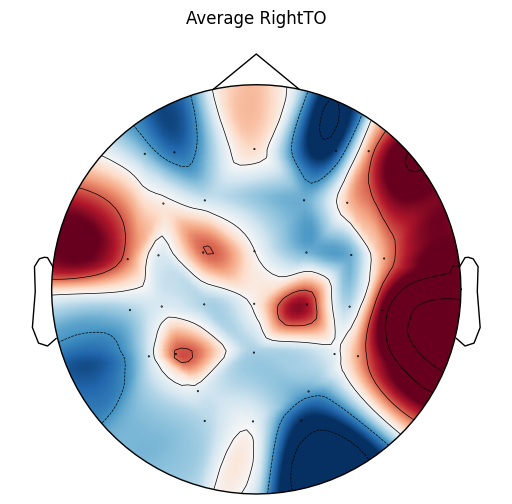

<Figure size 800x600 with 0 Axes>

In [ ]:
rto_data = proc_df[df['task'] == 'RightTO'].mean().values
fig, ax = plt.subplots(figsize=(8, 6))
plt.title(f'Average RightTO')
mne.viz.plot_topomap(rto_data, info, axes=ax, show=True)
plt.figure(figsize=(8, 6))
plt.show()

<ipython-input-94-d710503c2dc1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rto_data = proc_df[df['task'] == 'RightHS'].mean().values


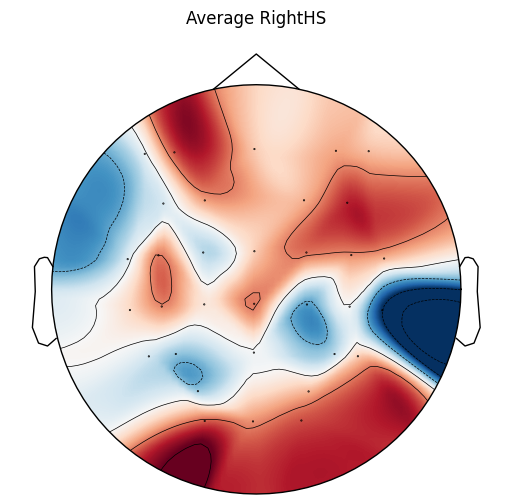

<Figure size 800x600 with 0 Axes>

In [ ]:
rto_data = proc_df[df['task'] == 'RightHS'].mean().values
fig, ax = plt.subplots(figsize=(8, 6))
plt.title(f'Average RightHS')
mne.viz.plot_topomap(rto_data, info, axes=ax, show=True)
plt.figure(figsize=(8, 6))
plt.show()

<ipython-input-95-298b5f9e1307>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rto_data = proc_df[df['task'] == 'LeftTO'][electrodes].mean().values


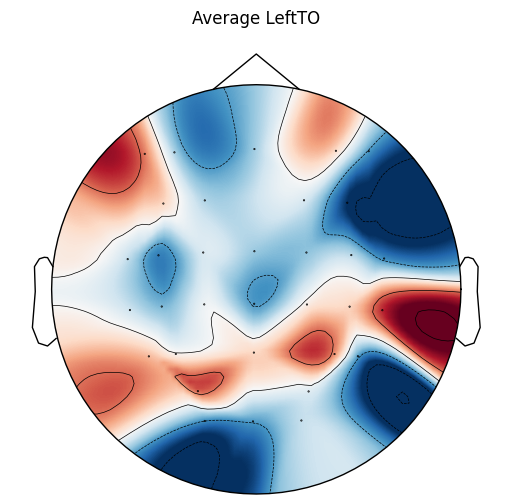

<Figure size 800x600 with 0 Axes>

In [ ]:
rto_data = proc_df[df['task'] == 'LeftTO'][electrodes].mean().values
fig, ax = plt.subplots(figsize=(8, 6))
plt.title(f'Average LeftTO')
mne.viz.plot_topomap(rto_data, info, axes=ax, show=True)
plt.figure(figsize=(8, 6))
plt.show()

<ipython-input-96-b8f54f57d0c3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rto_data = proc_df[df['task'] == 'LeftHS'][electrodes].mean().values


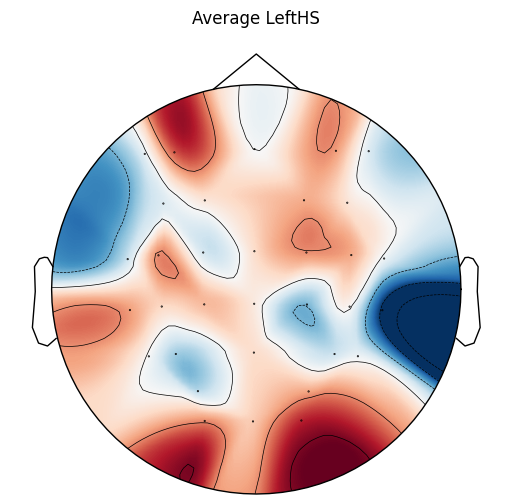

<Figure size 800x600 with 0 Axes>

In [ ]:
rto_data = proc_df[df['task'] == 'LeftHS'][electrodes].mean().values
fig, ax = plt.subplots(figsize=(8, 6))
plt.title(f'Average LeftHS')
mne.viz.plot_topomap(rto_data, info, axes=ax, show=True)
plt.figure(figsize=(8, 6))
plt.show()

# ASR

In [ ]:
dataset_path = 'drive/MyDrive/BmiResearch/data/datasets/preprocessed/a_walk_in_the_park/ASR/sub-001/X_fit.json'
proc_df = codecs.open(dataset_path, 'r', encoding='utf-8').read()
proc_df = json.loads(proc_df)
proc_df = np.array(proc_df)
proc_df = pd.DataFrame(data = proc_df, columns=electrodes)
print(proc_df.shape)
proc_df.head(2)

(321805, 33)


Fz        F3       FC1        C3       CP5           CP1        Pz  \
0 -0.000015 -0.000008  0.000006 -0.000005 -0.000011 -1.376912e-06  0.000001   
1 -0.000015 -0.000008  0.000006 -0.000005 -0.000011 -6.635183e-07  0.000001   

         P3        O1        Oz  ...        P5       PO3       PO4        P6  \
0 -0.000004 -0.000006  0.000002  ...  0.000015  0.000010  0.000002  0.000009   
1 -0.000004 -0.000006  0.000005  ...  0.000017  0.000012  0.000003  0.000009   

        CPz       CP4        C6        C2       FC4        F6  
0  0.000017  0.000011  0.000013  0.000012  0.000016  0.000017  
1  0.000018  0.000012  0.000013  0.000012  0.000015  0.000016  

[2 rows x 33 columns]

<ipython-input-98-b917e0a15892>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rto_data = proc_df[df['task'] == 'RightTO'].mean().values


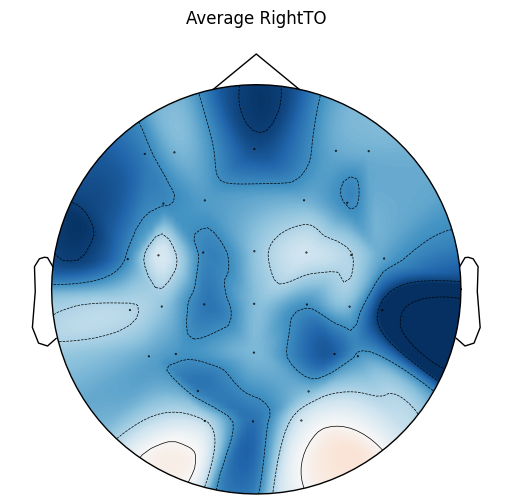

<Figure size 800x600 with 0 Axes>

In [ ]:
rto_data = proc_df[df['task'] == 'RightTO'].mean().values
fig, ax = plt.subplots(figsize=(8, 6))
plt.title(f'Average RightTO')
mne.viz.plot_topomap(rto_data, info, axes=ax, show=True)
plt.figure(figsize=(8, 6))
plt.show()

<ipython-input-99-d710503c2dc1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rto_data = proc_df[df['task'] == 'RightHS'].mean().values


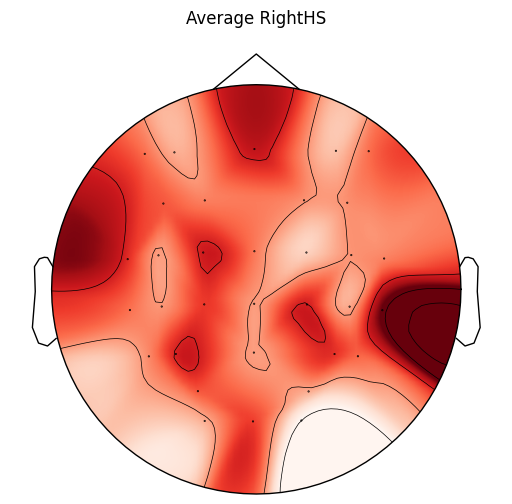

<Figure size 800x600 with 0 Axes>

In [ ]:
rto_data = proc_df[df['task'] == 'RightHS'].mean().values
fig, ax = plt.subplots(figsize=(8, 6))
plt.title(f'Average RightHS')
mne.viz.plot_topomap(rto_data, info, axes=ax, show=True)
plt.figure(figsize=(8, 6))
plt.show()

<ipython-input-100-298b5f9e1307>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rto_data = proc_df[df['task'] == 'LeftTO'][electrodes].mean().values


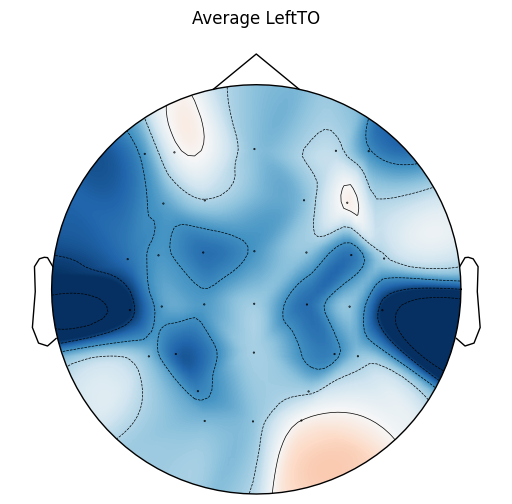

<Figure size 800x600 with 0 Axes>

In [ ]:
rto_data = proc_df[df['task'] == 'LeftTO'][electrodes].mean().values
fig, ax = plt.subplots(figsize=(8, 6))
plt.title(f'Average LeftTO')
mne.viz.plot_topomap(rto_data, info, axes=ax, show=True)
plt.figure(figsize=(8, 6))
plt.show()

<ipython-input-101-b8f54f57d0c3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rto_data = proc_df[df['task'] == 'LeftHS'][electrodes].mean().values


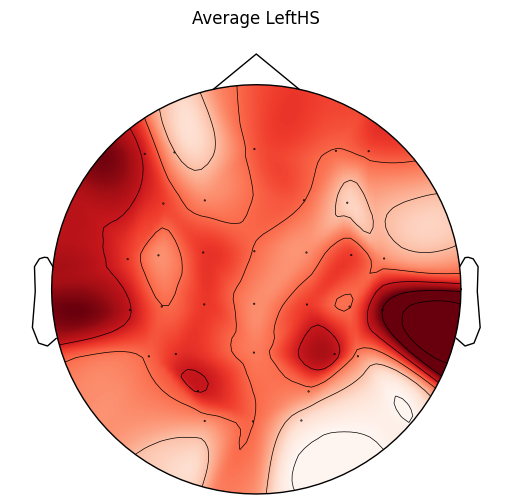

<Figure size 800x600 with 0 Axes>

In [ ]:
rto_data = proc_df[df['task'] == 'LeftHS'][electrodes].mean().values
fig, ax = plt.subplots(figsize=(8, 6))
plt.title(f'Average LeftHS')
mne.viz.plot_topomap(rto_data, info, axes=ax, show=True)
plt.figure(figsize=(8, 6))
plt.show()

# ICA

In [ ]:
dataset_path = 'drive/MyDrive/BmiResearch/data/datasets/preprocessed/a_walk_in_the_park/NOSP_ICA/sub-001/X_fit.json'
proc_df = codecs.open(dataset_path, 'r', encoding='utf-8').read()
proc_df = json.loads(proc_df)
proc_df = np.array(proc_df)
proc_df = pd.DataFrame(data = proc_df, columns=electrodes)
print(proc_df.shape)
proc_df.head(2)

(321805, 33)


Fz        F3       FC1        C3       CP5       CP1        Pz  \
0 -0.329765 -0.141653  0.784182  0.146639  0.888913 -0.160259  0.707022   
1 -0.409507 -0.185960  0.734200  0.018453  0.684534 -0.127712  0.674208   

         P3        O1        Oz  ...        P5       PO3       PO4        P6  \
0  0.353339 -0.632774 -0.483266  ... -0.894669  0.102690 -0.454901 -0.000690   
1  0.334039 -0.667922 -0.519844  ... -0.972961  0.069764 -0.451079  0.232362   

        CPz       CP4        C6        C2       FC4        F6  
0 -0.096660  0.672472  0.847682  0.520819 -0.107911 -0.302214  
1 -0.048846  0.709817  0.785065  0.502266 -0.129827 -0.281296  

[2 rows x 33 columns]

<ipython-input-104-b917e0a15892>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rto_data = proc_df[df['task'] == 'RightTO'].mean().values


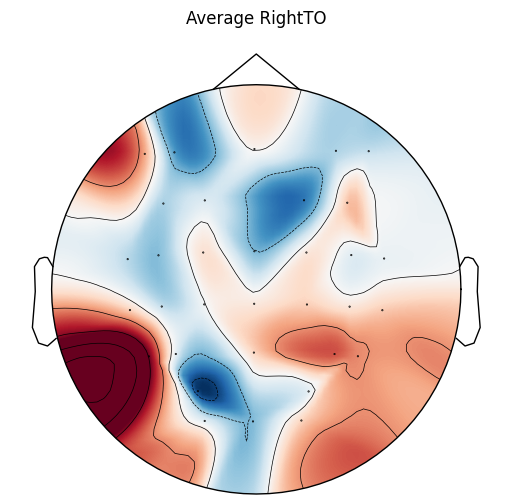

<Figure size 800x600 with 0 Axes>

In [ ]:
rto_data = proc_df[df['task'] == 'RightTO'].mean().values
fig, ax = plt.subplots(figsize=(8, 6))
plt.title(f'Average RightTO')
mne.viz.plot_topomap(rto_data, info, axes=ax, show=True)
plt.figure(figsize=(8, 6))
plt.show()

<ipython-input-105-d710503c2dc1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rto_data = proc_df[df['task'] == 'RightHS'].mean().values


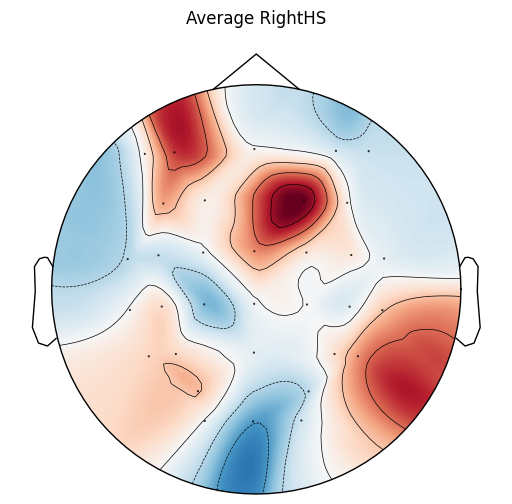

<Figure size 800x600 with 0 Axes>

In [ ]:
rto_data = proc_df[df['task'] == 'RightHS'].mean().values
fig, ax = plt.subplots(figsize=(8, 6))
plt.title(f'Average RightHS')
mne.viz.plot_topomap(rto_data, info, axes=ax, show=True)
plt.figure(figsize=(8, 6))
plt.show()

<ipython-input-106-298b5f9e1307>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rto_data = proc_df[df['task'] == 'LeftTO'][electrodes].mean().values


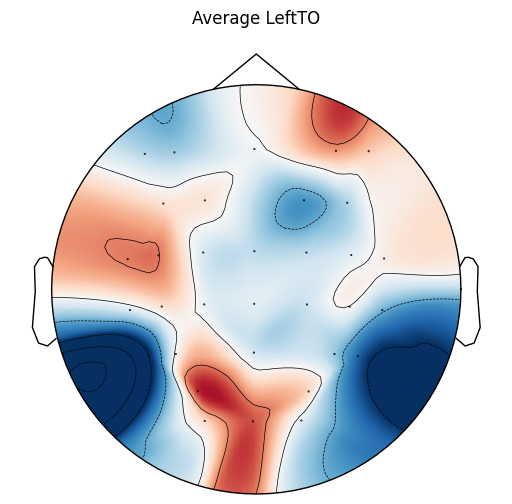

<Figure size 800x600 with 0 Axes>

In [ ]:
rto_data = proc_df[df['task'] == 'LeftTO'][electrodes].mean().values
fig, ax = plt.subplots(figsize=(8, 6))
plt.title(f'Average LeftTO')
mne.viz.plot_topomap(rto_data, info, axes=ax, show=True)
plt.figure(figsize=(8, 6))
plt.show()

<ipython-input-107-b8f54f57d0c3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rto_data = proc_df[df['task'] == 'LeftHS'][electrodes].mean().values


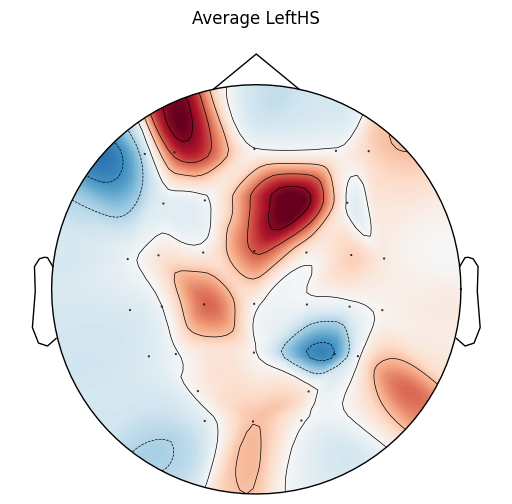

<Figure size 800x600 with 0 Axes>

In [ ]:
rto_data = proc_df[df['task'] == 'LeftHS'][electrodes].mean().values
fig, ax = plt.subplots(figsize=(8, 6))
plt.title(f'Average LeftHS')
mne.viz.plot_topomap(rto_data, info, axes=ax, show=True)
plt.figure(figsize=(8, 6))
plt.show()

# CSP

In [ ]:
dataset_path = 'drive/MyDrive/BmiResearch/data/datasets/preprocessed/a_walk_in_the_park/NOSP_CSP/sub-001/X_fit.json'
proc_df = codecs.open(dataset_path, 'r', encoding='utf-8').read()
proc_df = json.loads(proc_df)
proc_df = np.array(proc_df)
proc_df = pd.DataFrame(data = proc_df, columns=electrodes)
print(proc_df.shape)
proc_df.head(2)

(321720, 33)


Fz        F3       FC1        C3       CP5       CP1        Pz  \
0  0.074025 -0.127668  0.367507 -0.191374  0.165455  0.199375 -0.493505   
1  0.097026 -0.164239  0.333115 -0.077067  0.180202  0.183788 -0.580679   

         P3        O1        Oz  ...        P5      PO3       PO4        P6  \
0  0.503243 -0.098271  0.528311  ...  0.036279  1.16487  0.663638  0.849198   
1  0.334533 -0.130413  0.469859  ...  0.253595  1.12281  0.669401  0.790291   

        CPz       CP4        C6        C2       FC4        F6  
0 -0.320342 -0.990305 -0.084988  0.236211 -0.674934  0.567478  
1 -0.115942 -0.996624 -0.005527  0.173449 -0.558737  0.571683  

[2 rows x 33 columns]

<ipython-input-109-b917e0a15892>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rto_data = proc_df[df['task'] == 'RightTO'].mean().values


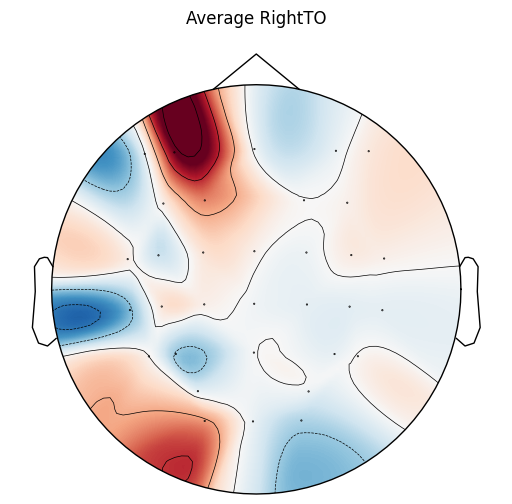

<Figure size 800x600 with 0 Axes>

In [ ]:
rto_data = proc_df[df['task'] == 'RightTO'].mean().values
fig, ax = plt.subplots(figsize=(8, 6))
plt.title(f'Average RightTO')
mne.viz.plot_topomap(rto_data, info, axes=ax, show=True)
plt.figure(figsize=(8, 6))
plt.show()

<ipython-input-110-d710503c2dc1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rto_data = proc_df[df['task'] == 'RightHS'].mean().values


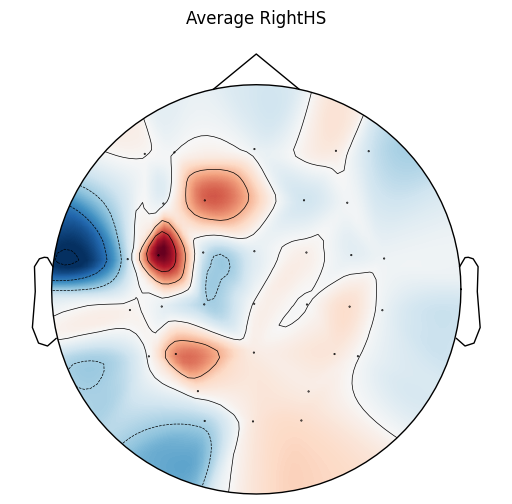

<Figure size 800x600 with 0 Axes>

In [ ]:
rto_data = proc_df[df['task'] == 'RightHS'].mean().values
fig, ax = plt.subplots(figsize=(8, 6))
plt.title(f'Average RightHS')
mne.viz.plot_topomap(rto_data, info, axes=ax, show=True)
plt.figure(figsize=(8, 6))
plt.show()

<ipython-input-111-298b5f9e1307>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rto_data = proc_df[df['task'] == 'LeftTO'][electrodes].mean().values


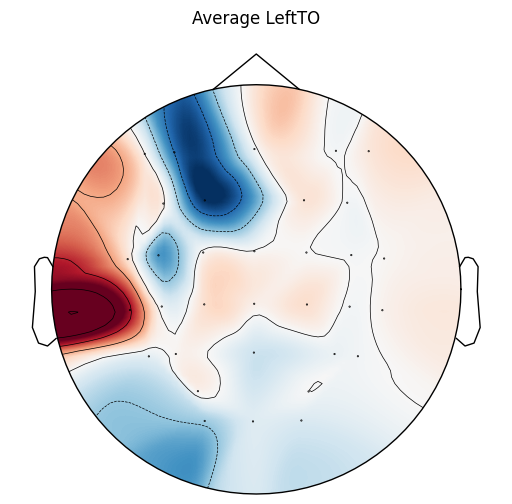

<Figure size 800x600 with 0 Axes>

In [ ]:
rto_data = proc_df[df['task'] == 'LeftTO'][electrodes].mean().values
fig, ax = plt.subplots(figsize=(8, 6))
plt.title(f'Average LeftTO')
mne.viz.plot_topomap(rto_data, info, axes=ax, show=True)
plt.figure(figsize=(8, 6))
plt.show()

<ipython-input-112-b8f54f57d0c3>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rto_data = proc_df[df['task'] == 'LeftHS'][electrodes].mean().values


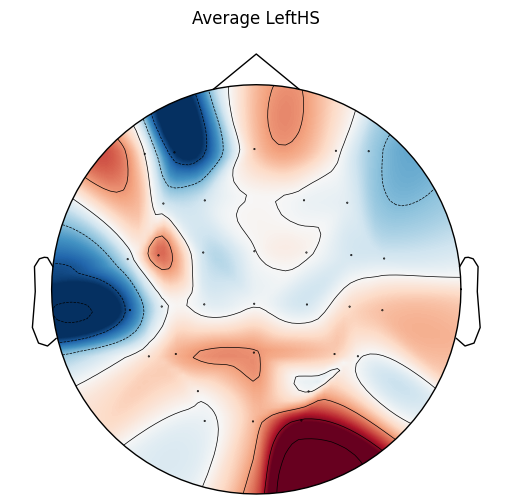

<Figure size 800x600 with 0 Axes>

In [ ]:
rto_data = proc_df[df['task'] == 'LeftHS'][electrodes].mean().values
fig, ax = plt.subplots(figsize=(8, 6))
plt.title(f'Average LeftHS')
mne.viz.plot_topomap(rto_data, info, axes=ax, show=True)
plt.figure(figsize=(8, 6))
plt.show()

# Avarage plot NOSP-NOFE

In [ ]:
path = 'drive/MyDrive/BmiResearch/data/datasets/preprocessed/a_walk_in_the_park/low-1-high-20-frequency-500/sub-001/eeg_data.csv'
df = pd.read_csv(path)
electrodes = list(df.columns)[0:-1]
# rto_data = df[df['task'] == 'RightTO'][electrodes].mean().values
# print(df.shape)
# df.head(2)

In [ ]:
path = 'drive/MyDrive/BmiResearch/data/datasets/preprocessed/a_walk_in_the_park/baseline_chunked_data/sub-001/X_fit.json'
data = codecs.open(path, 'r', encoding='utf-8').read()
data = json.loads(data)
data = np.array(data)
df=pd.DataFrame(data=data, index=[i for i in range(data.shape[0])], columns=electrodes)
# rto_data = df[df['task'] == 'RightTO'][electrodes].mean().values
test_line_nosp_nofe = df['Cz'][0:2000].to_numpy()
print(df.shape)

path = 'drive/MyDrive/BmiResearch/data/datasets/preprocessed/a_walk_in_the_park/baseline_chunked_data/sub-001/y_fit.json'
y_fit = codecs.open(path, 'r', encoding='utf-8').read()
y_fit = json.loads(y_fit)
y_fit = np.array(y_fit)
print(y_fit.shape)

labels = [class_names_dict_1[el] for el in y_fit]

df['task'] = labels

(321805, 33)
(321805,)


In [ ]:
target_sequence = ['RightHS', 'LeftTO', 'LeftHS', 'RightTO']
chunks = []
last_class = None
gait_dict = {'RightHS':[], 'LeftTO':[], 'LeftHS':[], 'RightTO':[]}
length_RightHS = []
length_LeftTO = []
length_LeftHS = []
length_RightTO = []

for i in range(len(df)):
    current_class = df['task'].iloc[i]

    # starting new gait
    if (current_class == 'RightHS') and (last_class == 'RightTO'):
      write = True
      for class_name in target_sequence:
        if len(gait_dict[class_name]) == 0:
          write = False
      if (len(gait_dict['RightHS']) <= 64) or (len(gait_dict['RightHS']) >= 90):
        write = False
      if (len(gait_dict['RightTO']) <= 160) or (len(gait_dict['RightTO']) >= 250):
        write = False
      if (len(gait_dict['LeftTO']) <= 160) or (len(gait_dict['LeftTO']) >= 250):
        write = False
      if (len(gait_dict['LeftHS']) <= 64) or (len(gait_dict['LeftHS']) >= 90):
        write = False

      if write:
        chunks.append(gait_dict.copy())
        # print(f"Added RightHS {len(gait_dict['RightHS'])}; LeftTO {len(gait_dict['LeftTO'])}; LeftHS {len(gait_dict['LeftHS'])}; RightTO {len(gait_dict['RightTO'])}")
        length_RightHS.append(len(gait_dict['RightHS']))
        length_LeftTO.append(len(gait_dict['LeftTO']))
        length_LeftHS.append(len(gait_dict['LeftHS']))
        length_RightTO.append(len(gait_dict['RightTO']))
      gait_dict = {'RightHS':[], 'LeftTO':[], 'LeftHS':[], 'RightTO':[]}
    gait_dict[current_class].append(i)
    last_class = current_class

print(f"Len chunks = {len(chunks)}")
min_RightHS = np.min(length_RightHS)
min_LeftTO = np.min(length_LeftTO)
min_LeftHS = np.min(length_LeftHS)
min_RightTO = np.min(length_RightTO)
min_values_dict = {'RightHS':min_RightHS, 'LeftTO':min_LeftTO, 'LeftHS':min_LeftHS, 'RightTO':min_RightTO}
min_values_dict


Len chunks = 311


{'RightHS': 65, 'LeftTO': 171, 'LeftHS': 65, 'RightTO': 161}

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
all_gait_data_lists = []
for chunk in chunks:
  gait_data_list = []
  for class_name in target_sequence:
    gait_data_list.append(df['Cz'].iloc[chunk[class_name]][0:min_values_dict[class_name]]) # 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6'
  gait_df = pd.concat(gait_data_list)
  gait_df = gait_df.reset_index(drop=True)
  # print(gait_df.shape)
  all_gait_data_lists.append(gait_df)

final_df = pd.DataFrame(all_gait_data_lists)
print("final_df ", final_df.shape)

cz_nosp_nofe = final_df.T.mean(axis=1)
scaler = MinMaxScaler()
cz_nosp_nofe = scaler.fit_transform(cz_nosp_nofe.to_numpy().reshape(-1, 1))

final_df  (311, 462)


In [ ]:
to_plot_df = pd.DataFrame({'c5':c5, 'c6':c6, 'cz':cz})
to_plot_df.shape

(462, 3)

<Axes: >

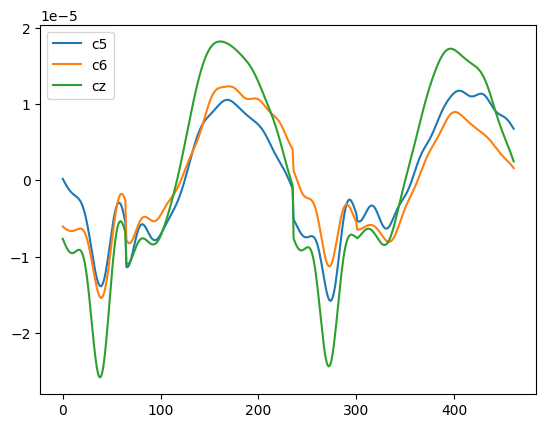

In [ ]:
to_plot_df.plot()

In [ ]:
len(electrodes)

33

In [ ]:
path = 'drive/MyDrive/BmiResearch/data/datasets/preprocessed/a_walk_in_the_park/SLF/sub-001/X_fit.json'
data = codecs.open(path, 'r', encoding='utf-8').read()
data = json.loads(data)
data = np.array(data)
df=pd.DataFrame(data=data, index=[i for i in range(data.shape[0])], columns=electrodes)
# rto_data = df[df['task'] == 'RightTO'][electrodes].mean().values
test_line_slf = df['Cz'][0:2000].to_numpy()
print(df.shape)

all_gait_data_lists = []
for chunk in chunks:
  gait_data_list = []
  for class_name in target_sequence:
    gait_data_list.append(df['Cz'].iloc[chunk[class_name]][0:min_values_dict[class_name]]) # 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6'
  gait_df = pd.concat(gait_data_list)
  gait_df = gait_df.reset_index(drop=True)
  # print(gait_df.shape)
  all_gait_data_lists.append(gait_df)

final_df = pd.DataFrame(all_gait_data_lists)
print("final_df ", final_df.shape)

cz_slf_nofe = final_df.T.mean(axis=1)

scaler = MinMaxScaler()
cz_slf_nofe = scaler.fit_transform(cz_slf_nofe.to_numpy().reshape(-1, 1))

(321805, 33)
final_df  (311, 462)


In [ ]:
path = 'drive/MyDrive/BmiResearch/data/datasets/preprocessed/a_walk_in_the_park/ASR/sub-001/X_fit.json'
data = codecs.open(path, 'r', encoding='utf-8').read()
data = json.loads(data)
data = np.array(data)
df=pd.DataFrame(data=data, index=[i for i in range(data.shape[0])], columns=electrodes)
# rto_data = df[df['task'] == 'RightTO'][electrodes].mean().values
test_line_asr = df['Cz'][0:2000].to_numpy()
df.shape

all_gait_data_lists = []
for chunk in chunks:
  gait_data_list = []
  for class_name in target_sequence:
    ids = chunk[class_name]
    ids = [el+125 for el in ids]
    gait_data_list.append(df['Cz'].iloc[ids][0:min_values_dict[class_name]]) # 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6'
  gait_df = pd.concat(gait_data_list)
  gait_df = gait_df.reset_index(drop=True)
  # print(gait_df.shape)
  all_gait_data_lists.append(gait_df)

final_df = pd.DataFrame(all_gait_data_lists)
print("final_df ", final_df.shape)

cz_asr_nofe = final_df.T.mean(axis=1)
scaler = MinMaxScaler()
cz_asr_nofe = scaler.fit_transform(cz_asr_nofe.to_numpy().reshape(-1, 1))

final_df  (311, 462)


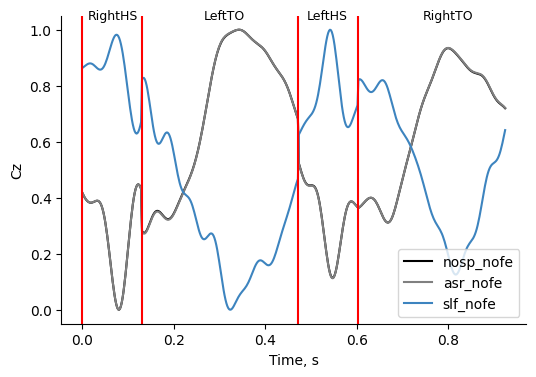

In [ ]:
fig = plt.figure()
fig.set_size_inches(6, 4)
ax  = fig.add_subplot(111)
x = np.linspace(0, cz_nosp_nofe.shape[0]/500, cz_nosp_nofe.shape[0])
ax.plot(x, cz_nosp_nofe, c='black', label='nosp_nofe')
ax.plot(x, cz_asr_nofe, c='grey', label='asr_nofe')
ax.plot(x, cz_slf_nofe, c='#3d84bf', label='slf_nofe') # , µV/cm²
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axvline(x = 65/500, color = 'red') # {'RightHS': 65, 'LeftTO': 171, 'LeftHS': 65, 'RightTO': 161}
plt.axvline(x = (65+171)/500, color = 'red')
plt.axvline(x = (65+171+65)/500, color = 'red')
plt.axvline(x = 0, color = 'red')
text_kwargs = dict(ha='center', va='center', fontsize=9, color='black')
plt.text(33/500,1.05,'RightHS', **text_kwargs)
plt.text(155/500,1.05,'LeftTO', **text_kwargs)
plt.text(268/500,1.05,'LeftHS', **text_kwargs)
plt.text(400/500,1.05,'RightTO', **text_kwargs)
plt.ylabel('Cz')
plt.xlabel('Time, s')
plt.legend(loc='lower right')
plt.show()
# fig.savefig('test2png.png', dpi=100)

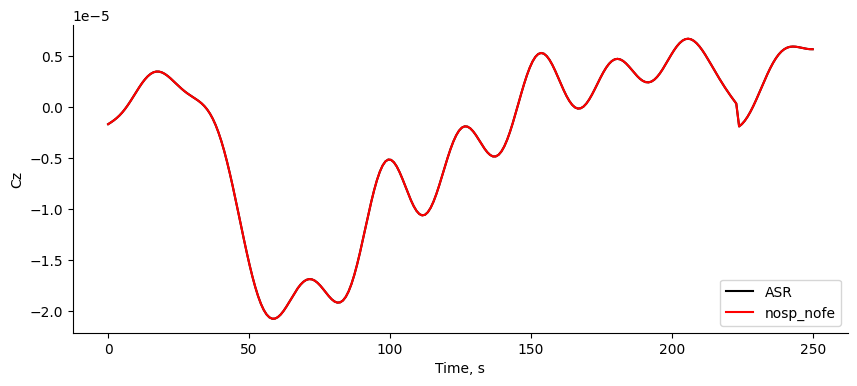

In [ ]:
fig = plt.figure()
fig.set_size_inches(10, 4)
ax  = fig.add_subplot(111)
# x = np.linspace(0, test_line_asr.shape[0], test_line_asr.shape[0])
x = np.linspace(0, 250, 250)
ax.plot(x, test_line_asr[125:375], c='black', label='ASR')
ax.plot(x, test_line_nosp_nofe[0:250], c='red', label='nosp_nofe')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
text_kwargs = dict(ha='center', va='center', fontsize=9, color='black')
plt.ylabel('Cz')
plt.xlabel('Time, s')
plt.legend(loc='lower right')
plt.show()

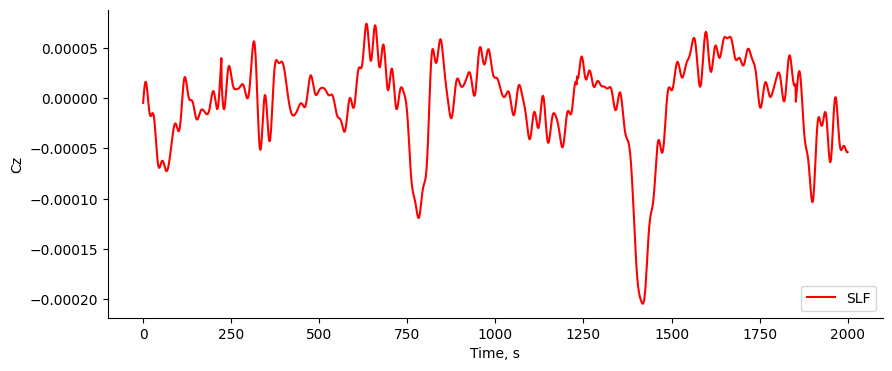

In [ ]:
fig = plt.figure()
fig.set_size_inches(10, 4)
ax  = fig.add_subplot(111)
x = np.linspace(0, test_line_asr.shape[0], test_line_asr.shape[0])
ax.plot(x, test_line_slf, c='red', label='SLF')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
text_kwargs = dict(ha='center', va='center', fontsize=9, color='black')
plt.ylabel('Cz')
plt.xlabel('Time, s')
plt.legend(loc='lower right')
plt.show()

final_df  (311, 462)


In [ ]:
path = 'drive/MyDrive/BmiResearch/data/datasets/preprocessed/a_walk_in_the_park/NOSP_ICA/sub-001/X_fit.json'
data = codecs.open(path, 'r', encoding='utf-8').read()
data = json.loads(data)
data = np.array(data)
df=pd.DataFrame(data=data, index=[i for i in range(data.shape[0])], columns=electrodes)
# rto_data = df[df['task'] == 'RightTO'][electrodes].mean().values
test_line_nosp_ica = df['Cz'][0:2000].to_numpy()
print(df.shape)

all_gait_data_lists = []
for chunk in chunks:
  gait_data_list = []
  for class_name in target_sequence:
    gait_data_list.append(df[electrodes[1]].iloc[chunk[class_name]][0:min_values_dict[class_name]]) # 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6'
  gait_df = pd.concat(gait_data_list)
  gait_df = gait_df.reset_index(drop=True)
  # print(gait_df.shape)
  all_gait_data_lists.append(gait_df)

final_df = pd.DataFrame(all_gait_data_lists)
print("final_df ", final_df.shape)

cz_nosp_ica = final_df.T.mean(axis=1)

scaler = MinMaxScaler()
cz_nosp_ica = scaler.fit_transform(cz_nosp_ica.to_numpy().reshape(-1, 1))

(321805, 33)
final_df  (311, 462)


In [ ]:
path = 'drive/MyDrive/BmiResearch/data/datasets/preprocessed/a_walk_in_the_park/NOSP_CSP/sub-001/X_fit.json'
data = codecs.open(path, 'r', encoding='utf-8').read()
data = json.loads(data)
data = np.array(data)
df=pd.DataFrame(data=data, index=[i for i in range(data.shape[0])], columns=electrodes)
# rto_data = df[df['task'] == 'RightTO'][electrodes].mean().values
test_line_nosp_csp = df['Cz'][0:2000].to_numpy()
print(df.shape)

all_gait_data_lists = []
for chunk in chunks:
  gait_data_list = []
  for class_name in target_sequence:
    gait_data_list.append(df[electrodes[-1]].iloc[chunk[class_name]][0:min_values_dict[class_name]]) # 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6'
  gait_df = pd.concat(gait_data_list)
  gait_df = gait_df.reset_index(drop=True)
  # print(gait_df.shape)
  all_gait_data_lists.append(gait_df)

final_df = pd.DataFrame(all_gait_data_lists)
print("final_df ", final_df.shape)

cz_nosp_csp = final_df.T.mean(axis=1)

scaler = MinMaxScaler()
cz_nosp_csp = scaler.fit_transform(cz_nosp_csp.to_numpy().reshape(-1, 1))

(321720, 33)
final_df  (311, 462)


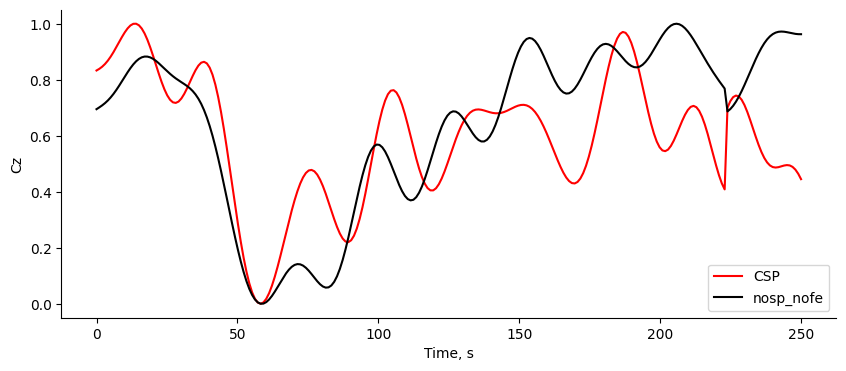

In [ ]:
fig = plt.figure()
fig.set_size_inches(10, 4)
ax  = fig.add_subplot(111)
# x = np.linspace(0, test_line_asr.shape[0], test_line_asr.shape[0])
x = np.linspace(0, 250, 250)
scaler1 = MinMaxScaler()
cz_nosp_csp_t = scaler1.fit_transform(test_line_nosp_csp[0:250].reshape(-1, 1))

scaler2 = MinMaxScaler()
cz_nosp_nofe_t = scaler2.fit_transform(test_line_nosp_nofe[0:250].reshape(-1, 1))

ax.plot(x, cz_nosp_csp_t, c='red', label='CSP') #[125:375]
ax.plot(x, cz_nosp_nofe_t, c='black', label='nosp_nofe')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
text_kwargs = dict(ha='center', va='center', fontsize=9, color='black')
plt.ylabel('Cz')
plt.xlabel('Time, s')
plt.legend(loc='lower right')
plt.show()

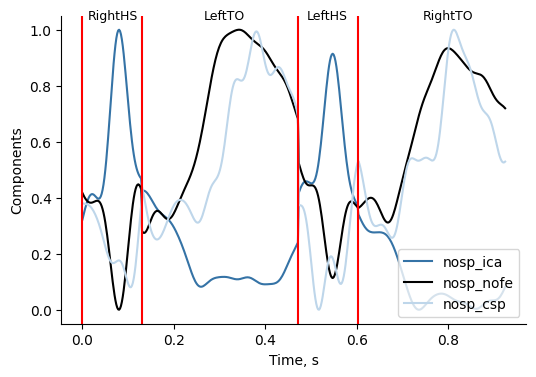

In [ ]:
fig = plt.figure()
fig.set_size_inches(6, 4)
ax  = fig.add_subplot(111)
x = np.linspace(0, cz_nosp_nofe.shape[0]/500, cz_nosp_nofe.shape[0])
# ax.plot(x, cz_nosp_nofe, c='black', label='nosp_nofe')
# ax.plot(x, cz_asr_nofe, c='grey', label='asr_nofe')
# ax.plot(x, cz_slf_nofe, c='red', label='slf_nofe') # , µV/cm²
ax.plot(x, cz_nosp_ica, c='#3573a6', label='nosp_ica')
ax.plot(x, cz_nosp_nofe, c='black', label='nosp_nofe')
ax.plot(x, cz_nosp_csp, c='#bed6ea', label='nosp_csp')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axvline(x = 65/500, color = 'red') # {'RightHS': 65, 'LeftTO': 171, 'LeftHS': 65, 'RightTO': 161}
plt.axvline(x = (65+171)/500, color = 'red')
plt.axvline(x = (65+171+65)/500, color = 'red')
plt.axvline(x = 0, color = 'red')
text_kwargs = dict(ha='center', va='center', fontsize=9, color='black')
plt.text(33/500,1.05,'RightHS', **text_kwargs)
plt.text(155/500,1.05,'LeftTO', **text_kwargs)
plt.text(268/500,1.05,'LeftHS', **text_kwargs)
plt.text(400/500,1.05,'RightTO', **text_kwargs)
plt.ylabel('Components')
plt.xlabel('Time, s')
plt.legend(loc='lower right')
plt.show()
# fig.savefig('test2png.png', dpi=100)

In [ ]:
'ASR_CSP',
 'ASR_ICA',
 'ASR_NOFE',
 'ASR_STFT',
 'NOSP_CSP',
 'NOSP_ICA',
 'NOSP_NOFE',
 'NOSP_STFT',
 'SLF_CSP',
 'SLF_ICA',
 'SLF_NOFE',
 'SLF_STFT'

# Wilcoxon test

In [ ]:
base_name = 'NOSP_NOFE'
compare_name = 'NOSP_CSP'
classifier = 'cnn'
base_path = f'drive/MyDrive/BmiResearch/models/{classifier}/NOSP_NOFE'
compare_path = f'drive/MyDrive/BmiResearch/models/{classifier}/NOSP_CSP'


In [ ]:
base = []
compare = []
for subject in sorted(os.listdir(base_path)):
  base_path_subject = f'{base_path}/{subject}'
  compare_path_subject = f'{compare_path}/{subject}'
  f_base = codecs.open(f'{base_path_subject}/experiment_results.json', 'r', encoding='utf-8').read()
  f_base = json.loads(f_base)
  base.append(f_base['f1_score'])
  f_compare = codecs.open(f'{compare_path_subject}/experiment_results.json', 'r', encoding='utf-8').read()
  f_compare = json.loads(f_compare)
  compare.append(f_compare['f1_score'])

df_for_test = pd.DataFrame(list(zip(base, compare)),
                  columns=[base_name, compare_name])
df_for_test

NOSP_NOFE  NOSP_CSP
0       0.921     0.924
1       0.945     0.944
2       0.967     0.964
3       0.942     0.949
4       0.892     0.889
5       0.876     0.877
6       0.880     0.894
7       0.887     0.876
8       0.889     0.899
9       0.922     0.912
10      0.887     0.872
11      0.938     0.942
12      0.880     0.904
13      0.931     0.933

In [ ]:
base_name = 'NOSP_NOFE'
compare_name = 'NOSP_CSP'
classifier = 'lstm'
base = [0.801, 0.909, 0.899, 0.834, 0.663, 0.619, 0.823, 0.659, 0.806, 0.831, 0.659, 0.914, 0.75, 0.848]
compare = [0.857, 0.925, 0.937, 0.882, 0.808, 0.816, 0.828, 0.797, 0.85, 0.895, 0.797, 0.933, 0.863, 0.899]
df_for_test = pd.DataFrame(list(zip(base, compare)),
                  columns=[base_name, compare_name])
df_for_test

NOSP_NOFE  NOSP_CSP
0       0.801     0.857
1       0.909     0.925
2       0.899     0.937
3       0.834     0.882
4       0.663     0.808
5       0.619     0.816
6       0.823     0.828
7       0.659     0.797
8       0.806     0.850
9       0.831     0.895
10      0.659     0.797
11      0.914     0.933
12      0.750     0.863
13      0.848     0.899

In [ ]:
# Perform Wilcoxon signed-rank test
stat, p_value = wilcoxon(df_for_test[base_name], df_for_test[compare_name])

# Print the results
print(f"Wilcoxon statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print(f"There is a significant difference between the two {classifier} models {base_name} and {compare_name} (reject H0).")
else:
    print(f"There is no significant difference between the two {classifier} models {base_name} and {compare_name} (fail to reject H0).")

Wilcoxon statistic: 0.0
P-value: 0.0001220703125
There is a significant difference between the two lstm models NOSP_NOFE and NOSP_CSP (reject H0).


In [ ]:
len(chunks[0]['RightHS'])

83

In [ ]:
df[electrodes].iloc[chunks[0]['RightHS']][0:min_values_dict['RightHS']].shape

(65, 33)

# Inference time

In [ ]:
processing = 'SLF'
path = f'drive/MyDrive/BmiResearch/data/datasets/preprocessed/a_walk_in_the_park/{processing}'
time_s = []
for subject in sorted(os.listdir(path)):
  subject_path = f'{path}/{subject}/experiment_settings.json'
  f = codecs.open(subject_path, 'r', encoding='utf-8').read()
  f = json.loads(f)
  time_s.append(f[subject]['proc_1_test_ch_s'])

av = sum(time_s) / len(time_s)

print(f'{processing} takes {av} seconds')

SLF takes 0.31207642857142853 seconds


In [ ]:
["signal_processing"]

In [ ]:

f1_rows = []
for subject in subjects:
    slice_df = result_df[(result_df['subject'] == subject)&(result_df['classifier'] == classifier)][['algo', 'f1_score']]
    slice_dict = dict(zip(slice_df['algo'], slice_df['f1_score']))
    f1_rows.append(slice_dict)

f1_df = pd.DataFrame(f1_rows) # [0:7]
f1_df

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
output_path = 'drive/MyDrive/BmiResearch/models/lstm_200/NOSP_NOFE'
for subject in sorted(os.listdir(output_path)):

  output_path_subject = f'{output_path}/{subject}'
  f = codecs.open(f'{output_path_subject}/experiment_results.json', 'r', encoding='utf-8').read()
  f = json.loads(f)
  if subject == 'sub-001':
    plt.plot(range(200), f['train_dict']['loss_train_hist'], 'r-', label='Train loss', linewidth=0.9, alpha=0.5)
    plt.plot(range(200), f['train_dict']['loss_test_hist'], 'b-', label='Validation loss', linewidth=0.9, alpha=0.5)

  plt.plot(range(200), f['train_dict']['loss_train_hist'], 'r-', linewidth=0.9, alpha=0.5)
  plt.plot(range(200), f['train_dict']['loss_test_hist'], 'b-', linewidth=0.9, alpha=0.5)